### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

### Load Data

In [2]:
df= pd.read_csv('players_20.csv')
pd.set_option('display.max_columns',None)
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

## **Domain Analysis**

### **1. Player Information**
- **`player_url`** → A unique URL linking to the player’s profile in the FIFA database. Useful for external reference.  
- **`short_name`** → The commonly used name of the player, making it easier to recognize.  
- **`long_name`** → The full official name of the player, useful for detailed documentation.  
- **`dob` (Date of Birth)** → Represents the player's birth date; can be used to calculate age dynamically.  

---

### **2. Physical Attributes**
- **`age`** → A crucial factor in player potential; younger players often have higher potential growth.  
- **`height_cm`** → Impacts performance in aerial duels and headers, particularly for defenders and strikers.  
- **`weight_kg`** → Affects balance, stamina, and strength, impacting gameplay for different positions.  
- **`body_type`** → Defines the player’s physique (e.g., lean, stocky) and affects movement mechanics.  

---

### **3. Contract & Financial Details**
- **`club`** → Shows which professional club the player belongs to; useful for team analysis.  
- **`value_eur`** → The estimated market value of a player in euros; highly skewed towards elite players.  
- **`wage_eur`** → The weekly salary of a player; important for club financial analysis.  
- **`release_clause_eur`** → The amount a club must pay to buy the player without negotiations.  
- **`contract_valid_until`** → The year until which the player’s contract with the club is valid.  
- **`loaned_from`** → Indicates if the player is on loan from another club.  

---

### **4. National Representation**
- **`nationality`** → Determines which country the player represents in international matches.  
- **`international_reputation`** → A rating (1 to 5) reflecting how well-known and influential the player is.  
- **`nation_position`** → The position a player plays for their national team (if selected).  
- **`nation_jersey_number`** → The jersey number assigned to the player in the national squad.  

---

### **5. Work Rate & Foot Preference**
- **`preferred_foot`** → Determines the dominant foot (Left/Right) used for passing, dribbling, and shooting.  
- **`weak_foot`** → A rating (1 to 5) that shows how well a player can use their non-dominant foot.  
- **`skill_moves`** → A rating (1 to 5) that represents a player's ability to perform skillful dribbles.  
- **`work_rate`** → Describes player movement in attack and defense (e.g., High/Low).  

---

### **6. Position & Playstyle**
- **`player_positions`** → Lists the positions the player can play (e.g., ST, CAM, CB).  
- **`team_jersey_number`** → The assigned jersey number for club matches.  
- **`joined`** → The date when the player joined their current club.  

---

### **7. Overall Performance Metrics**
- **`overall`** → A key rating summarizing the player’s overall ability.  
- **`potential`** → The highest rating a player can reach in career mode.  

---

### **8. Core Attributes (Outfield Players)**
#### **8.1 Attacking**
- **`attacking_crossing`** → Measures the player’s accuracy in crossing the ball.  
- **`attacking_finishing`** → Determines how well the player can convert chances into goals.  
- **`attacking_heading_accuracy`** → Affects the success rate of heading shots.  

#### **8.2 Skill**
- **`skill_dribbling`** → Defines how well a player can maneuver the ball while dribbling.  
- **`skill_curve`** → Affects the curve applied to shots and passes.  
- **`skill_fk_accuracy`** → Determines how accurate a player is at taking free kicks.  

#### **8.3 Movement**
- **`movement_acceleration`** → Defines how quickly a player reaches their top speed.  
- **`movement_sprint_speed`** → Measures the maximum speed a player can reach.  

#### **8.4 Power**
- **`power_shot_power`** → Determines the strength of a player’s shots.  
- **`power_jumping`** → Measures jumping height, useful for aerial duels.  

#### **8.5 Defending**
- **`defending_marking`** → Measures how well a player marks opponents.  
- **`defending_standing_tackle`** → Affects the ability to tackle while standing.  

#### **8.6 Mentality**
- **`mentality_composure`** → Defines how well a player performs under pressure.  
- **`mentality_vision`** → Affects the quality of a player’s long passes and through balls.  

---

### **9. Goalkeeping-Specific Attributes**
- **`gk_diving`** → Determines a goalkeeper’s ability to dive for saves.  
- **`gk_handling`** → Affects how well a goalkeeper catches and controls the ball.  
- **`gk_kicking`** → Measures the goalkeeper’s ability to distribute the ball using kicks.  
- **`gk_reflexes`** → Defines how fast a goalkeeper reacts to shots.  
- **`gk_speed`** → Affects how quickly the goalkeeper moves off the line.  
- **`gk_positioning`** → Determines how well the goalkeeper positions themselves for saves.  

### Basic Checks

In [3]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [4]:
df.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential  \
18273    China PR               Beijing Renhe FC       48         56   
18274    China PR               Shanghai SIPG FC       48         56   
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot  \
18273      40000      2000               CB          Right   
18274      40000      2000               CB          Right   
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
18273                         1          3            2    Medium/High   
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
18273    Normal        No             70000.0         NaN           RES   
18274    Normal        No             72000.0         NaN           SUB   
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until  \
18273                36.0              NaN  2018-07-13                2019.0   
18274                31.0              NaN  2019-02-01                2022.0   
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
18273             NaN                   NaN  57.0      23.0     28.0   
18274             NaN                   NaN  58.0      24.0     33.0   
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
18273       33.0       47.0    51.0        NaN          NaN         NaN   
18274       35.0       48.0    48.0        NaN          NaN         NaN   
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_trai

In [ ]:
df.shape

(18278, 104)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    sofifa_id                   int64  
 1    player_url                  object 
 2    short_name                  object 
 3    long_name                   object 
 4    age                         int64  
 5    dob                         object 
 6    height_cm                   int64  
 7    weight_kg                   int64  
 8    nationality                 object 
 9    club                        object 
 10   overall                     int64  
 11   potential                   int64  
 12   value_eur                   int64  
 13   wage_eur                    int64  
 14   player_positions            object 
 15   preferred_foot              object 
 16   international_reputation    int64  
 17   weak_foot                   int64  
 18   skill_moves                 int64  
 19   wo

In [ ]:
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                         1288
contract_valid_until            240
nation_position               17152
nation_jersey_number          17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
player_traits                 10712
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power                  0
power_jumping                     0
power_stamina                     0
power_strength                    0
power_long_shots                  0
mentality_aggression              0
mentality_interceptions           0
mentality_positioning             0
mentality_vision                  0
mentality_penalties               0
mentality_composure               0
defending_marking                 0
defending_standing_tackle         0
defending_sliding_tackle          0
goalkeeping_diving                0
goalkeeping_handling              0
goalkeeping_kicking               0
goalkeeping_positioning           0
goalkeeping_reflexes              0
ls                             2036
st                             2036
rs                             2036
lw                             2036
lf                             2036
cf                             2036
rf                             2036
rw                             2036
lam                            2036
cam                            2036
ram                            2036
lm                             2036
lcm                            2036
cm                             2036
rcm                            2036
rm                             2036
lwb                            2036
ldm                            2036
cdm                            2036
rdm                            2036
rwb                            2036
lb                             2036
lcb                            2036
cb                             2036
rcb                            2036
rb                             2036
dtype: int64

In [ ]:
df.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [ ]:
df.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/233449/ximing-pan/20...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality                     club  \
count        18278       18278       18278                    18278   
unique       18218        6142         162                      698   
top     Liam Kelly  1992-02-29     England  Wolverhampton Wanderers   
freq             3         113        1667                       33   

       player_positions preferred_foot      work_rate body_type real_face  \
count             18278          18278          18278     18278     18278   
unique              643              2              9        10         2   
top                  CB          Right  Medium/Medium    Normal        No   
freq               2322          13960           9875     10750     16310   

       player_tags team_position loaned_from      joined nation_position  \
count         1499         18038        1048       16990            1126   
unique          83            29         316        1760              26   
top      #Strength           SUB    Atalanta  2019-07-01             SUB   
freq           514          7820          17        1465             587   

        player_traits     ls     st     rs     lw     lf     cf     rf     rw  \
count            7566  16242  16242  16242  16242  16242  16242  16242  16242   
unique            921     94     94     94    107    103    103    103    107   
top     Early Crosser   61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   
freq              501    725    725    725    736    727    727    727    736   

          lam    cam    ram     lm    lcm     cm    rcm     rm    lwb    ldm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    103    103    100     88     88     88    100     98     98   
top      61+2   61+2   61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   
freq      748    748    748    809    775    775    775    809    682    636   

          cdm    rdm    rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  16242  16242  
unique     98     98     98     96    110    110    110     96  
top      59+2   59+2   59+2   61+2   63+2   63+2   63+2   61+2  
freq      636    636    682    667    621    621    621    667

## Exploratory Data Analysis (EDA)

* Remove the specail character and split the string, Because it creating issue to do analysis.

In [5]:
columns=['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
df[columns]

for column in columns:
    df[column]=df[column].str.split('+',expand=True)[0]

In [6]:
df = df.replace('[\#]','',regex=True)
df.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes         195800000.0   

                                         player_tags team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...            RW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  \
0                     8  89  89  89  93  93  93  93  93  93  93  93  92  87   

   cm rcm  rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb  
0  87  87  92  68  66  66  66  68  63  52  52  52  63

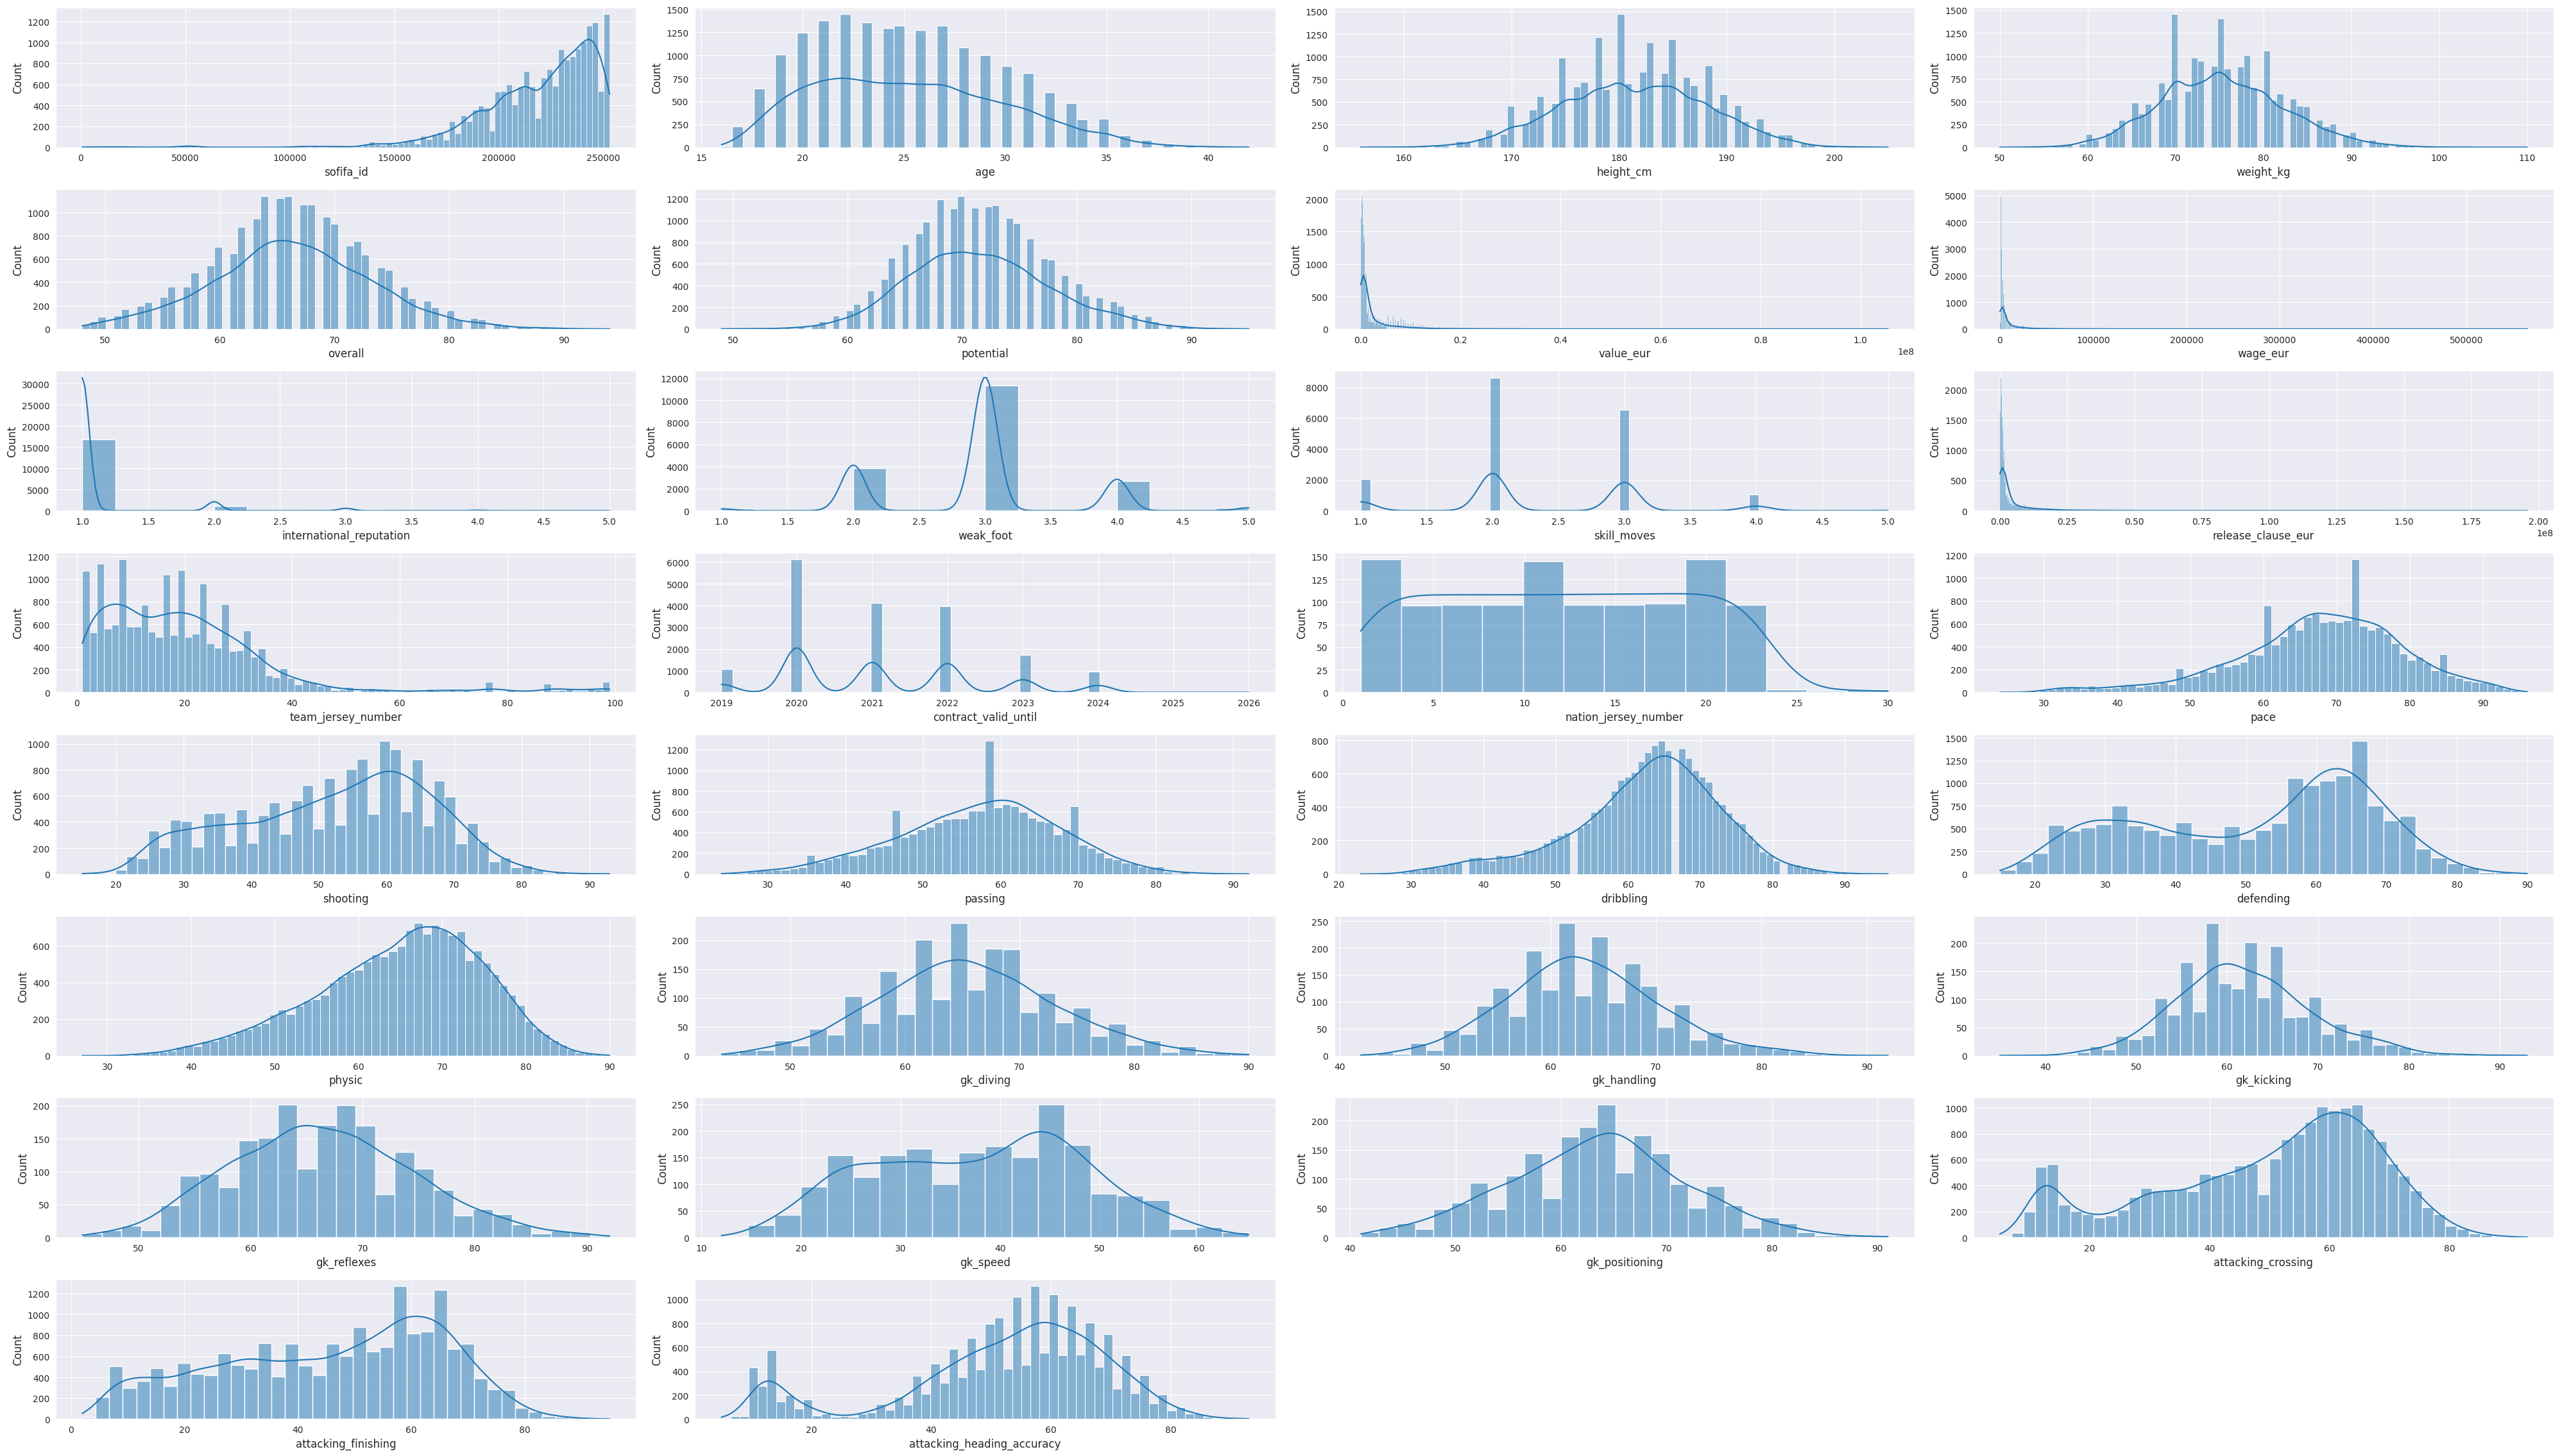

In [ ]:
plt.figure(figsize=(40, 45), facecolor='white')
plot_number = 1

for col in df.select_dtypes(include=['number']).columns:
    if plot_number <= 30:
        plt.subplot(16, 4, plot_number)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plot_number += 1

plt.tight_layout()
plt.show()


## Observation :  
* **sofifa_id** → Unique identifier; not useful for analysis.  
* **age** → Right-skewed; most players are young, with a drop after 25 years.  
* **height_cm** → Normally distributed; centered around 175-185 cm.  
* **weight_kg** → Almost normal, but some extreme values exist.  
* **overall** → Symmetrical distribution; most players have ratings between 60-80.  
* **potential** → Slightly right-skewed; young players tend to have higher potential.  
* **value_eur** → Highly right-skewed; only a few players have extremely high market values.  
* **wage_eur** → Highly skewed; most players have low wages, only top-tier players earn high.  
* **release_clause_eur** → Similar to value_eur; top players have very high release clauses.  
* **international_reputation** → Right-skewed; most players have a reputation score of 1 or 2.  
* **weak_foot** → Categorical-like distribution; most players have a weak foot rating of 3 or 4.  
* **skill_moves** → Bimodal distribution; most players have 2 or 3 skill moves, few have 5 stars.  
* **contract_valid_until** → Peaks at certain years; more contracts expire around 2020-2021.  
* **team_jersey_number** → Right-skewed; most players have numbers between 1-30.  
* **nation_jersey_number** → Uniformly spread; numbers are evenly distributed.  
* **pace** → Normally distributed; centered around 60-70, meaning average speed for most players.  
* **shooting** → Almost normal, but slightly right-skewed; attackers tend to have better shooting.  
* **passing** → Almost normal; midfielders have balanced passing scores.  
* **dribbling** → Slightly right-skewed; fewer players have very high dribbling stats.  
* **defending** → Left-skewed; most players have low defending stats (since defenders are fewer).  
* **physic** → Normally distributed, indicating balanced physical attributes.  
* **gk_diving** → Normally distributed, specific to goalkeepers.  
* **gk_handling** → Similar to diving, follows a normal distribution.  
* **gk_kicking** → Slightly right-skewed; some goalkeepers have much better kicking skills.  
* **gk_reflexes** → Normally distributed, indicating even distribution among goalkeepers.  
* **gk_speed** → Highly skewed; very few goalkeepers are fast, most are slow.  
* **gk_positioning** → Balanced distribution, showing variation in positioning skills.  
* **attacking_crossing** → Right-skewed; fewer players excel in crossing.  
* **attacking_heading_accuracy** → Normally distributed, meaning heading accuracy is fairly balanced.  

In [ ]:
def summary_numric(df_data, col, q_min, q_max):
    fig=plt.figure(figsize=(8,4),facecolor='white')
    layout_plot=(2,2)
    num_subplot=4
    axes=[None for _ in range(num_subplot)]
    list_shape_subplot=[[(0,0),(0,1),(1,0),(1,1)],[1,1,1,1],[1,1,1,1]]
    for i in range(num_subplot):
        axes[i]=plt.subplot2grid(
            layout_plot,
            list_shape_subplot[0][i],
        )

    sns.histplot(data = df_data, x = col, kde = True, ax = axes[0])
    stats.probplot(x = df_data[col], dist = stats.norm, plot = axes[1])
    sns.boxplot(data = df_data, x = col, ax = axes[2])
    pts = df_data[col].quantile(q = np.arange(q_min, q_max, 0.01))
    sns.lineplot(x = pts.index, y = pts, ax = axes[3])
    axes[3].grid(True)

    list_title = ["Histogram", "QQ plot", "Boxplot", "Outlier"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

* **Top 10 High-Variance Columns for Effective Clustering and Analysis**

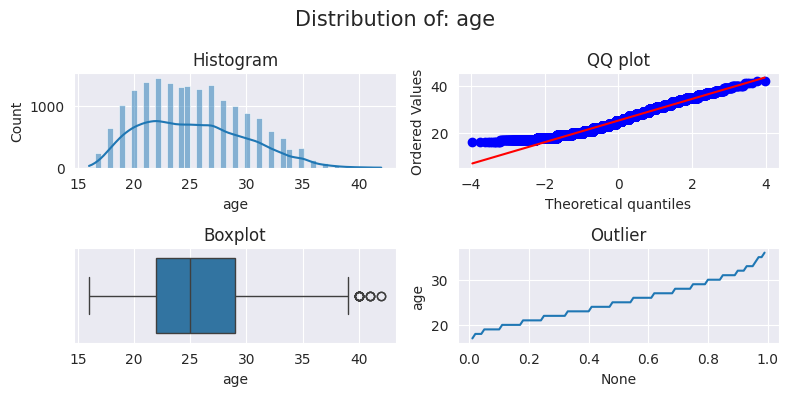

In [ ]:
summary_numric(df,'age',0.01,1)

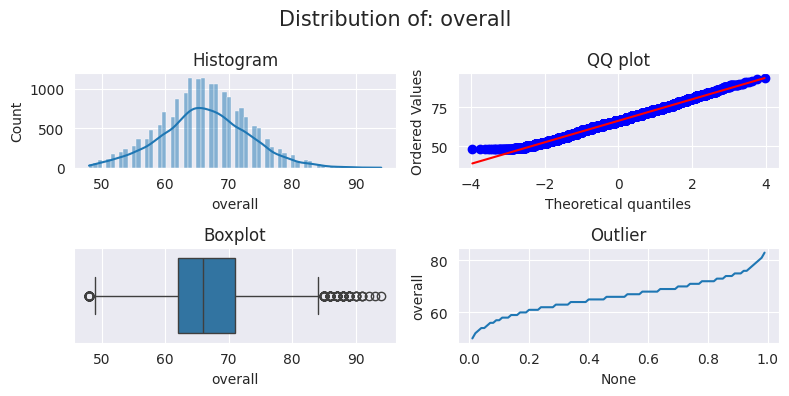

In [ ]:
summary_numric(df,'overall',0.01,1)

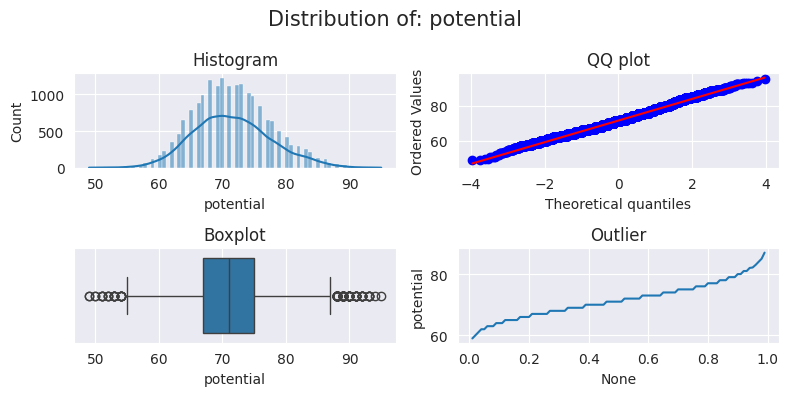

In [ ]:
summary_numric(df,'potential',0.01,1)

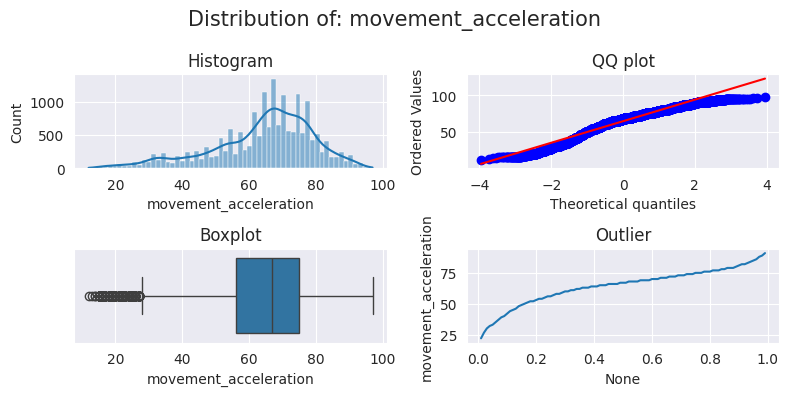

In [ ]:
summary_numric(df,'movement_acceleration',0.01,1)

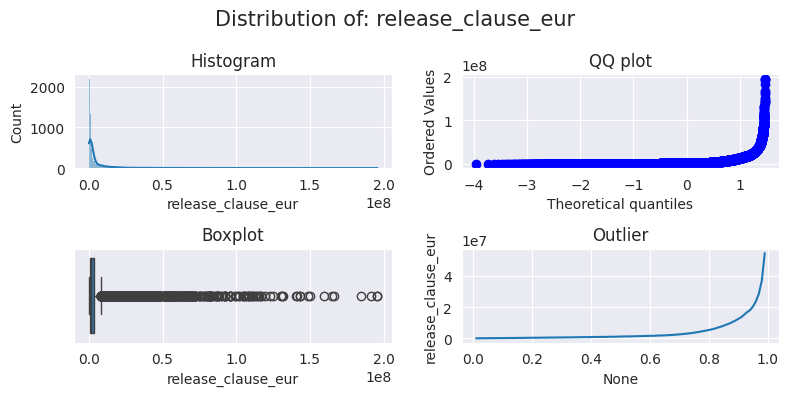

In [ ]:
summary_numric(df,'release_clause_eur',0.01,1)

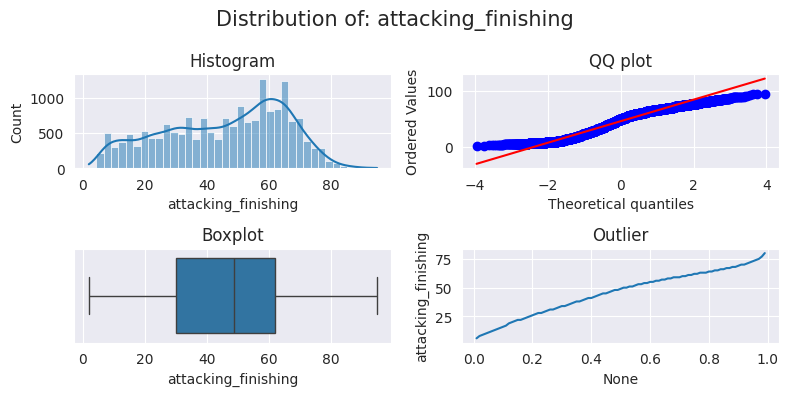

In [ ]:
summary_numric(df,'attacking_finishing',0.01,1)

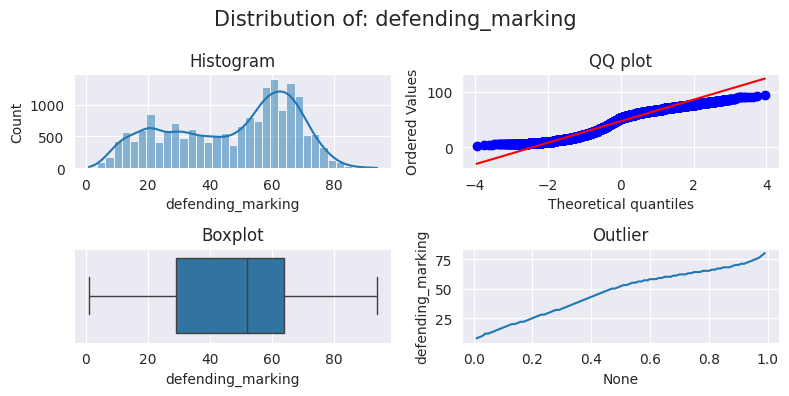

In [ ]:
summary_numric(df,'defending_marking',0.01,1)

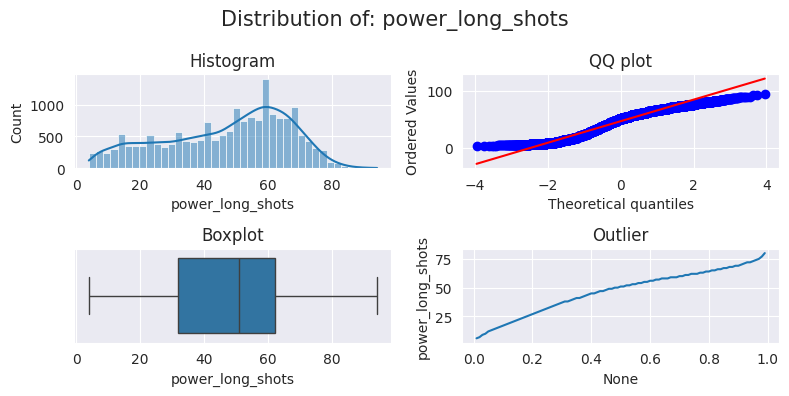

In [ ]:
summary_numric(df,'power_long_shots',0.01,1)

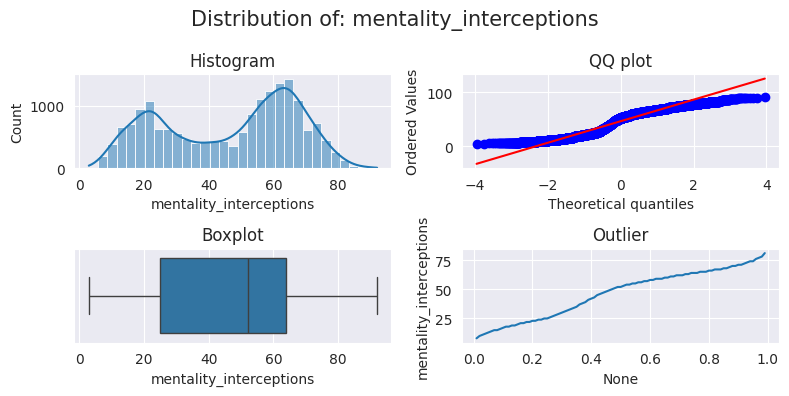

In [ ]:
summary_numric(df,'mentality_interceptions',0.01,1)

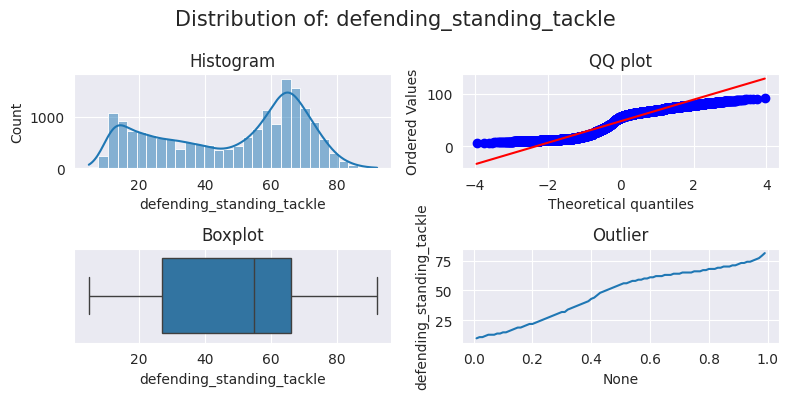

In [ ]:
summary_numric(df,'defending_standing_tackle',0.01,1)

# Bivariate Analysis

### **Numeric Variable**

* 1. Impact of Age to Movement reaction


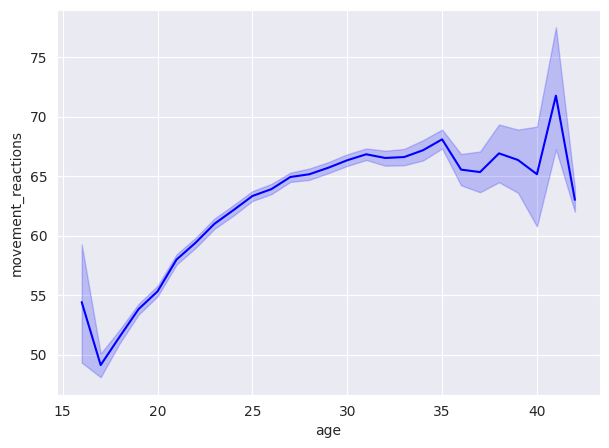

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='movement_reactions',data=df,color='blue')
plt.show()

### OBSERVATION
- At the age 15 to 20 movement raction is less.
-  If player age is increasing player movement reaction also increasing.


-- 2. Impact of Height to Weight

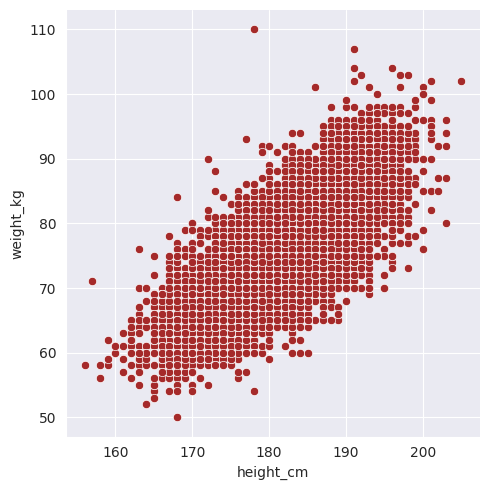

In [ ]:
sns.relplot(x='height_cm',y='weight_kg',data=df,color='brown')
plt.show()

### OBSERVATION:
* If the players height is increases player weight also increases.

-- 3. Relation between Overall and Potential with the respect of Preferred foot.

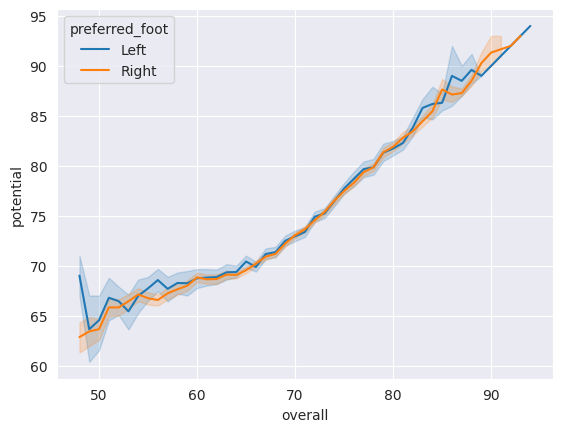

In [ ]:
sns.lineplot(x='overall',y='potential',data=df,color='red',hue='preferred_foot')
plt.show()

### OBSERVATION:
* If the players overall score is increasing the score of potential also increasing with both foot.

-- 4. Relation between Eur and Wage with the respect of Preferred foot.

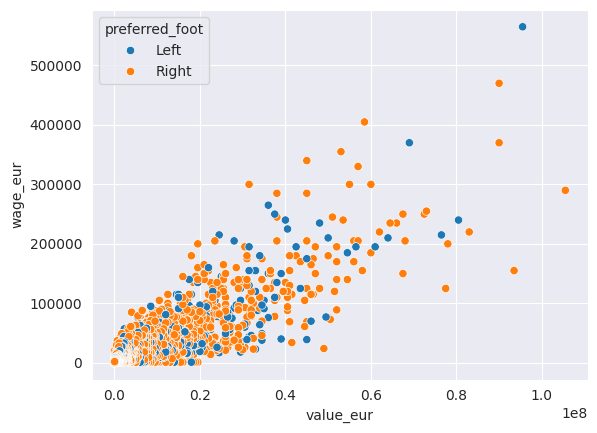

In [ ]:
sns.scatterplot(x='value_eur',y='wage_eur',data=df,color='brown',hue='preferred_foot')
plt.show()

### OBSERVATION:
 * If player value is less then the wage of player also less.
 * If the value of player is more the wage is silghtly more.

-- 5. Relation between Pace and shooting with the respect of Preferred foot.

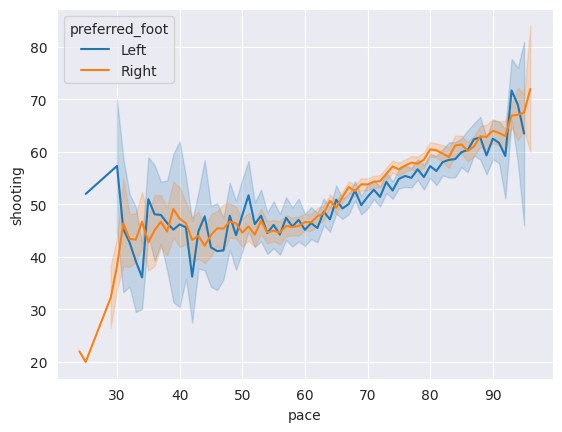

In [ ]:
sns.lineplot(x='pace',y='shooting',data=df,color='brown',hue='preferred_foot')
plt.show()

### OBSERVATION:
* If the player preferred left foot then the pace is less but shooting is around 50 to 60.
* If the player preferred right foot then the pace is less as well as shooting also less.

-- 6. Impact of Dribbling to Defending

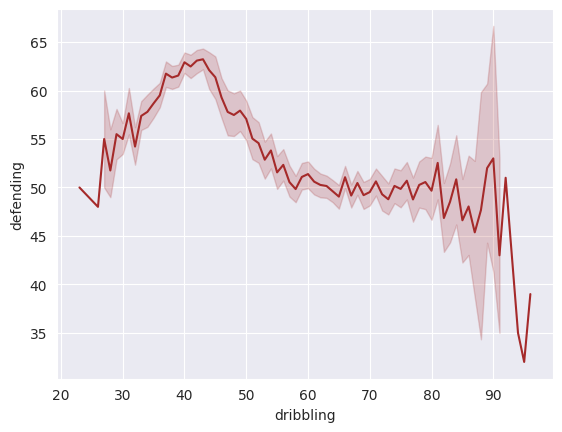

In [ ]:
sns.lineplot(x='dribbling',y='defending',data=df,color='brown')
plt.show()

### OBSERVATION:
* If the dribbling score is 30 to 50 then the defending score is high.
* If dribbling score is more then the defending score also less.

-- 7. Impact of Physic to Attacking Crossing

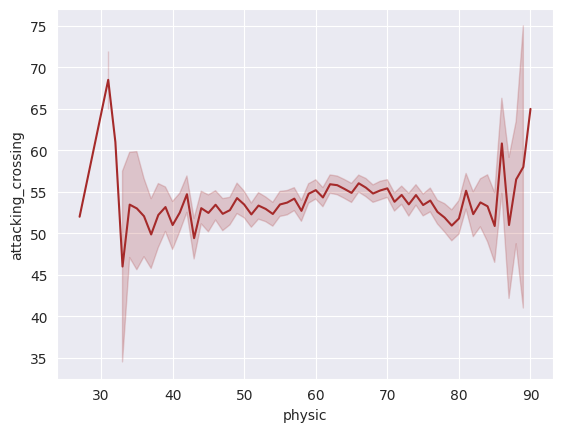

In [ ]:
sns.lineplot(x='physic',y='attacking_crossing',data=df,color='brown')
plt.show()

### OBSERVATION:
* If the physic is less then the attacking crossing is more.
* Otherwise physic range between 35 to 80 the attacking crossing is constant.

-- 8. Impact of Attacking Crossing to Attacking Finishing

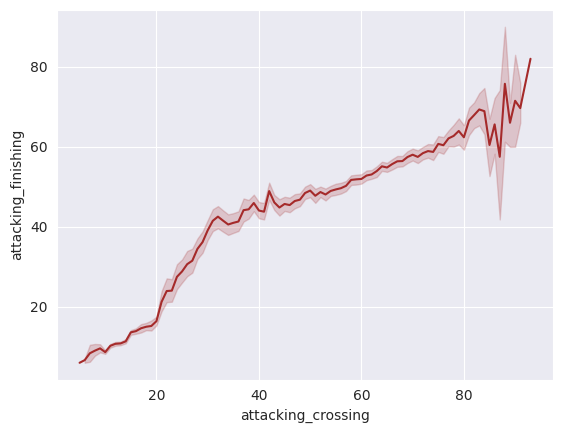

In [ ]:
sns.lineplot(x='attacking_crossing',y='attacking_finishing',data=df,color='brown')
plt.show()

### OBSERVATION:
* Attcking score between 20 to 40 then attacking finishing score around 40 to 50.
* Either attacking crossing is more then attacking finishing also more

-- 10. Impact of Attacking Short Passing to Attacking Volleys

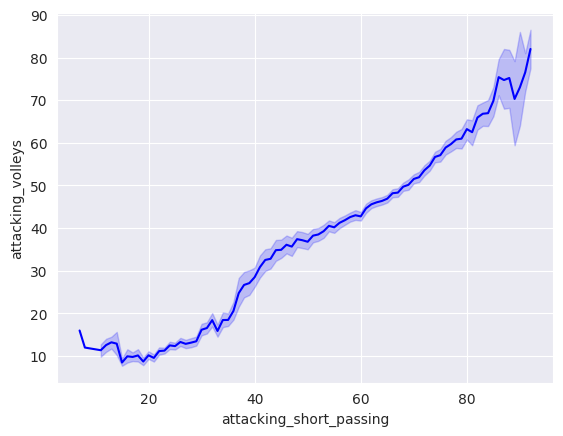

In [ ]:
sns.lineplot(x='attacking_short_passing',y='attacking_volleys',data=df,color='blue')
plt.show()

### OBSERVATION:
* More attacking short passing then the more attacking volleys.
* Less attacking short passing then the less attacking volleys.

-- 11. Impact of Skill Dribbling to Skill Ball Control.

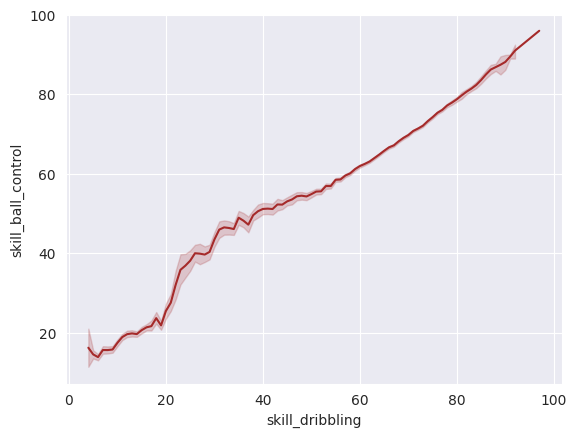

In [ ]:
sns.lineplot(x='skill_dribbling',y='skill_ball_control',data=df,color='brown')
plt.show()

### OBSERVATION:
* If the dribbling skill is more then ball control skill also more

-- 12. Relation betwwen Skill Curve and Skill fk Accuracy with the respect of Preferred Foot.

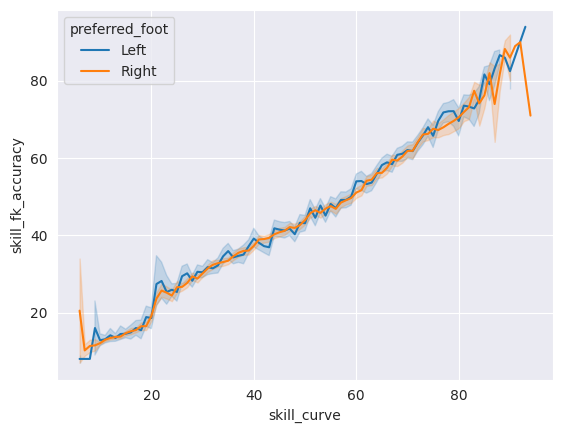

In [ ]:
sns.lineplot(x='skill_curve',y='skill_fk_accuracy',data=df,color='brown',hue='preferred_foot')
plt.show()

### OBSERVATION:
* If skill curve is increases then the skill fk accuracy is also increases with both foot.

-- 13. Impact of Skill Long Passing to Power Long Shots

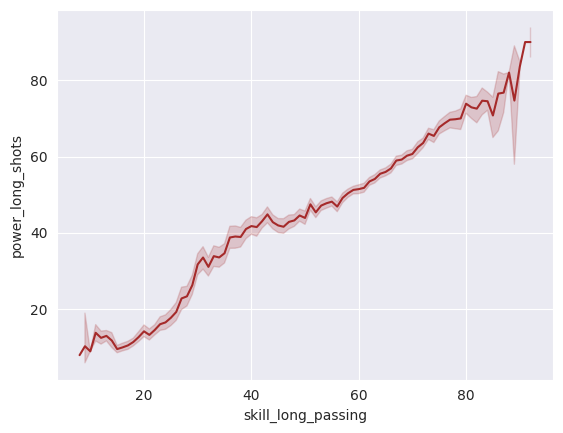

In [ ]:
sns.lineplot(x='skill_long_passing',y='power_long_shots',data=df,color='brown')
plt.show()

### OBSERVATION:
* More skills of long passing then the increase of power long shots.

-- 14. Impact of Movement Sprint Speed to Movement Reaction

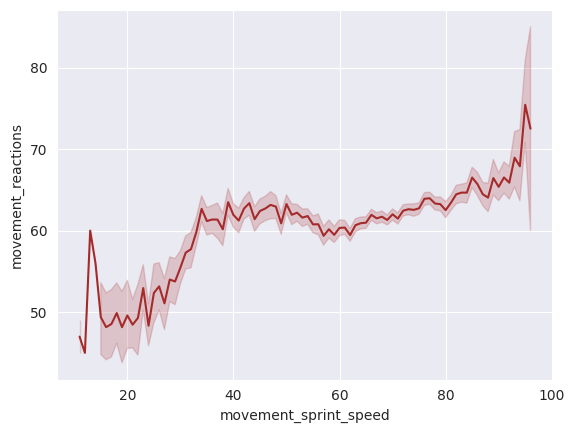

In [ ]:
sns.lineplot(x='movement_sprint_speed',y='movement_reactions',data=df,color='brown')
plt.show()

### OBSERVATION:
* Movement sprint range around 40 to 100 then the movement reaction is constant otherwise fall in both

-- 15.Impact of Power Shot to Power Stamina

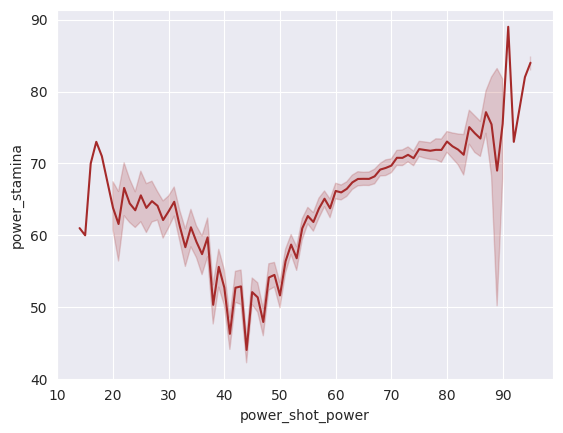

In [ ]:
sns.lineplot(x='power_shot_power',y='power_stamina',data=df,color='brown')
plt.show()

### OBSERVATION:
* If the power shot range around 30 to 60 then the power stamina is decreases
* If the player has more shot power then the stamina is more.

-- 16.Impact of Power Jumping to Power Strength

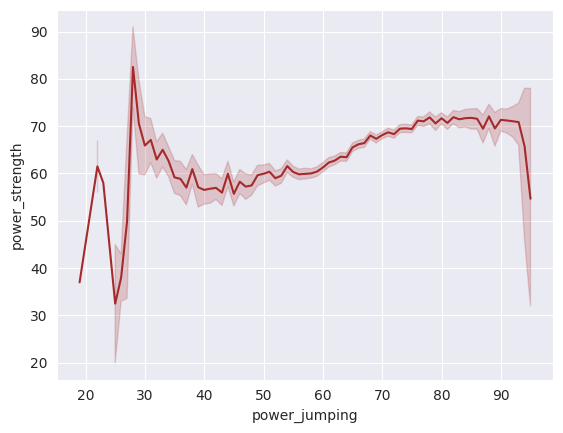

In [ ]:
sns.lineplot(x='power_jumping',y='power_strength',data=df,color='brown')
plt.show()

### OBSERVATION:
* If the power jumping is 30 then the power strength is more and below 30 power jumping less power strength.
* Power jumping above 30 then the power strength is constant

-- 17.Impact of Mentality Aggression to Mentality Positioning

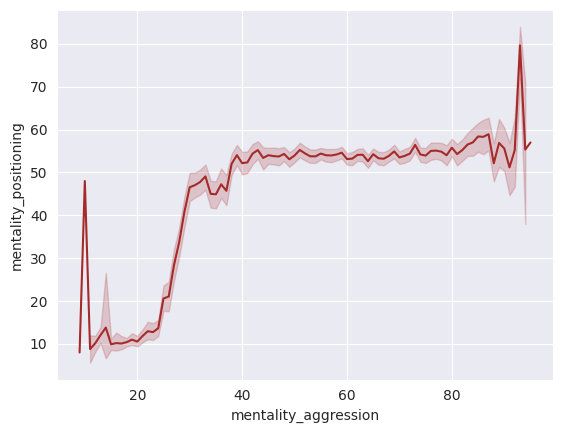

In [ ]:
sns.lineplot(x='mentality_aggression',y='mentality_positioning',data=df,color='brown')
plt.show()

### OBSERVATION:
* If the mentality aggression around 10 to 30 then the mentality positioning is low
* Below 10 mentality aggression the score of mentality positioning is slightly high. otherwise both metality positioning score is constant

-- 18. Impact of Mentality Penalties to Mentality Vision

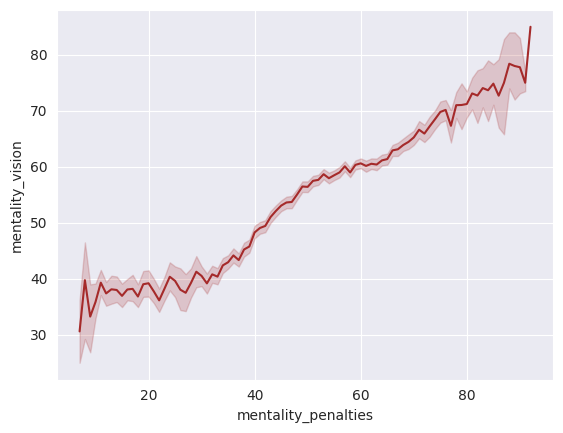

In [ ]:
sns.lineplot(x='mentality_penalties',y='mentality_vision',data=df,color='brown')
plt.show()

### OBSERVATION:
* If the penalties is increases then the mentality vision also increases.

-- 19.Relation betwwen Defending Standing Tackle and Defending Sliding Tacking with the respect of Preferred Foot.

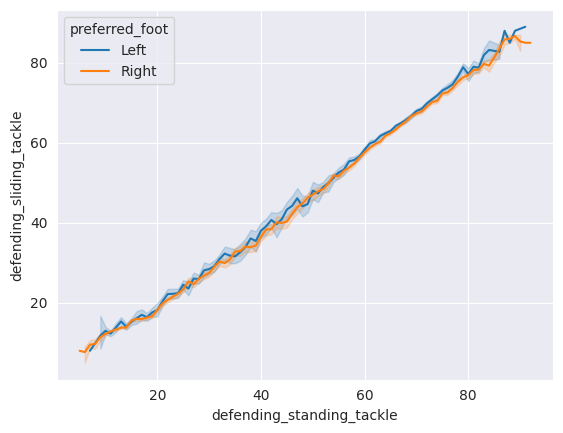

In [ ]:
sns.lineplot(x='defending_standing_tackle',y='defending_sliding_tackle',data=df,color='brown',hue='preferred_foot')
plt.show()

### OBSERVATION:
* If defending standing tackle is increases then the defending sliding tackle also increases with both foot.

### **Categorical Columns**

-- 1.Impact of International Reputation to Weak foot

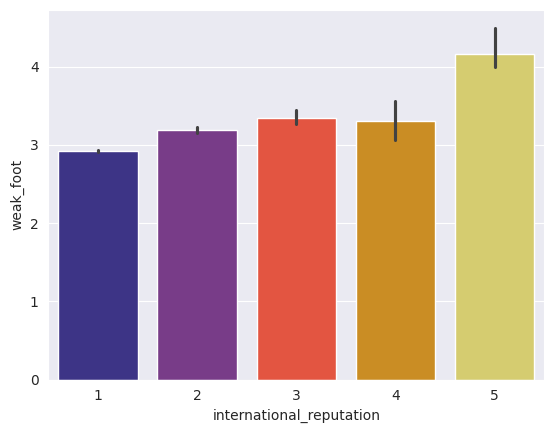

In [ ]:
sns.barplot(x='international_reputation',y='weak_foot',data=df,palette='CMRmap')
plt.show()

### OBSERVATION:
* 5 Intrenational reputation rating of player has more than 4 week foot
* 1 international reputation rating player has less than 3 weak foot
* 2, 3, 4 international reputation player has constant weak foot


-- 2. Impact of Work Rate to Skill Moves

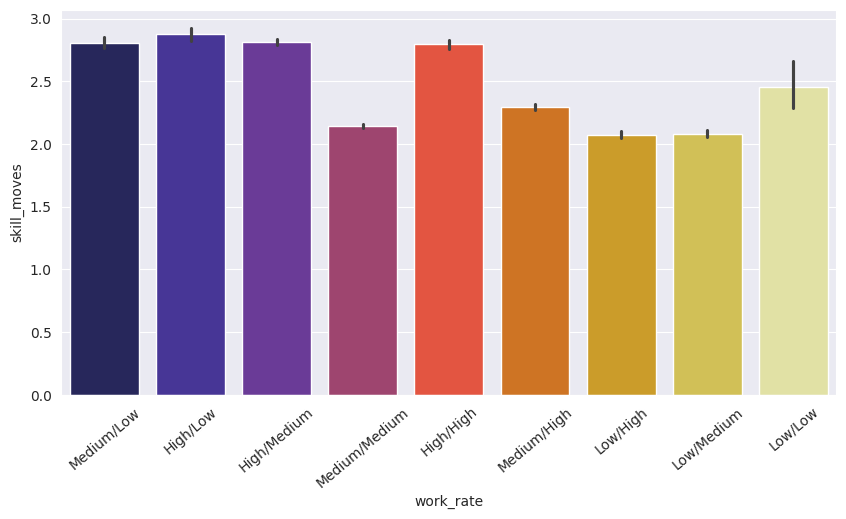

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='work_rate',y='skill_moves',data=df,palette='CMRmap')
plt.xticks(rotation=40)
plt.show()

### OBSERVATION:
* In this plot cleary seen that 4 types of work rate[medium/low, high/low, high/medium, high/high] has more than 2.5 skill moves
* Other work rate skill moves is less than 2.5

-- 3. Impact of Real Face to Release Clause Eur

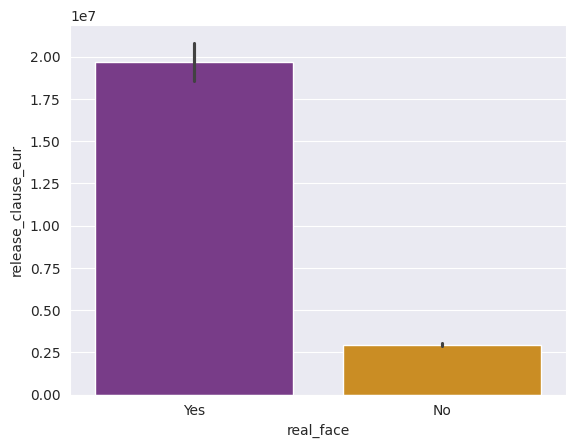

In [ ]:
sns.barplot(x='real_face',y='release_clause_eur',data=df,palette='CMRmap')
plt.show()

### OBSERVATION:
* If the player face is real then the release clause is more.
* If the player face is not real then the release clause is less

-- 4. Impact of Preferred foot to Pace

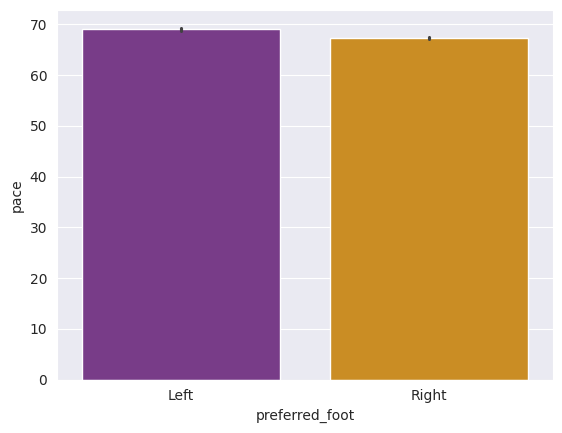

In [ ]:
sns.barplot(x='preferred_foot',y='pace',data=df,palette='CMRmap')
plt.show()

### OBSERVATION:
* both left and right preferred foot player pace is same.

-- 5. Impact of Team Position to Shooting

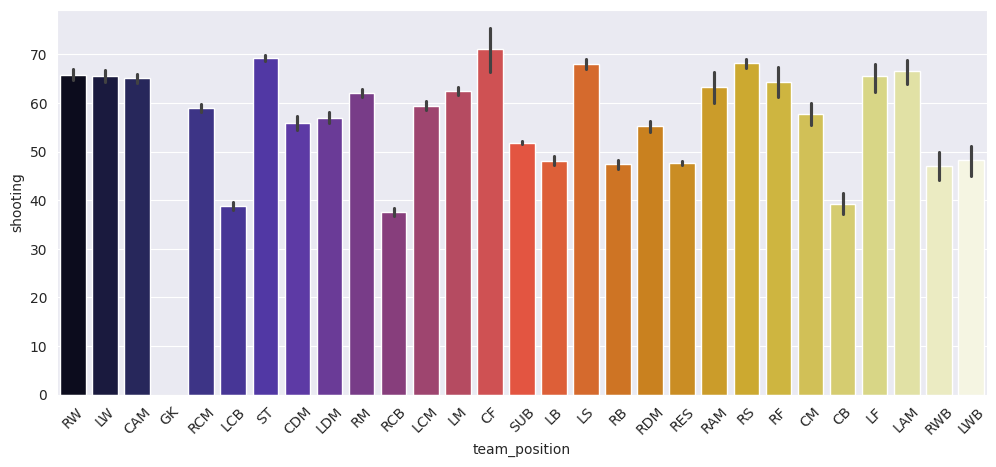

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='team_position',y='shooting',data=df,palette='CMRmap')
plt.xticks(rotation=45)
plt.show()


### OBSERVATION:
* In this plot we clearly seen that GK team position has no shooting score.
* CF team position has maximum shooting score

## **Task 3**

● 1.Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [ ]:
df['nationality'].value_counts().head(10)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

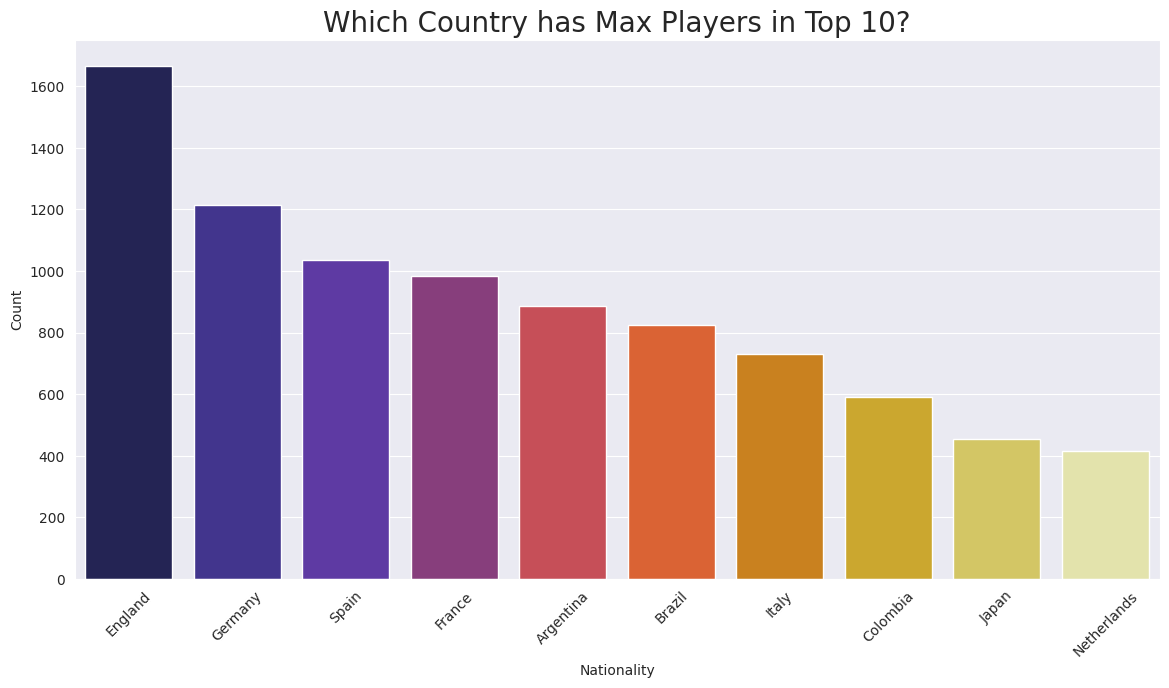

In [ ]:
plt.figure(figsize=(14,7))

top_nationalities = df['nationality'].value_counts().head(10).index

filtered_df = df[df['nationality'].isin(top_nationalities)]

sns.countplot(x='nationality', data=filtered_df, palette='CMRmap', order=top_nationalities)

plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max Players in Top 10?', fontsize=20)
plt.show()


### OBSERVATION :
Top 10 Countries: The bar chart shows the top 10 countries producing the most football players in the dataset.
* England Has the Most Players: The highest bar represents England, meaning it has the most players.
* Germany, Spain, and France Follow: These countries also have a high number of players but less than England.
* Argentina is the Top South American Country: Among non-European countries, Argentina appears in the top 10.
* Uneven Distribution: Some countries have significantly more players than others, showing that football talent is concentrated in a few nations.
* Conclusion: A few countries dominate football at the highest level, with Europe leading in player production.

* 2. Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

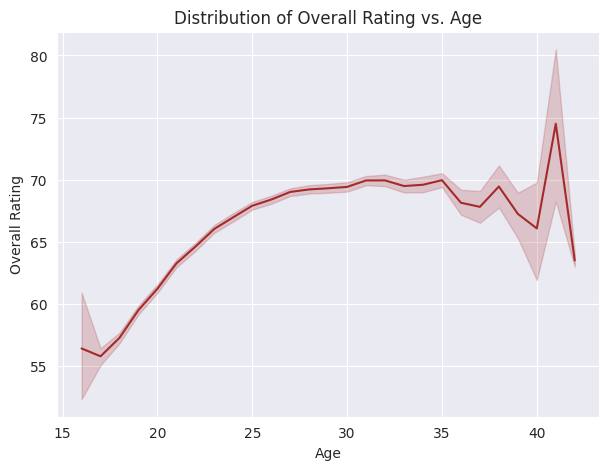

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')

sns.lineplot(x='age', y='overall', data=df, color='brown')
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.title("Distribution of Overall Rating vs. Age")
plt.show()


### OBSERVATION :
* Most players decline in performance after the age of 30.
* A few elite players, especially goalkeepers, maintain or slightly improve their ratings after 40.
* This does not mean players generally improve after 40.
* The rise in rating is an exception, mainly for experienced players in skill-based roles rather than physically demanding positions.

In [ ]:
df_offensive = df[df['player_positions'].isin(['ST', 'RW', 'LW'])]
avg_wages = df_offensive.groupby('player_positions')['wage_eur'].mean().sort_values(ascending=False)
print(avg_wages)


player_positions
ST    10256.495301
LW     9681.818182
RW     6208.791209
Name: wage_eur, dtype: float64


### OBSERVATION :
* Strikers (ST) tend to get paid the most, followed by Left-wingers (LW), while Right-wingers (RW) earn the least.
* This confirms that goal-scoring ability has a direct impact on player wages.

#### **Additional Analysis**

●	Historical comparison between Messi and Ronaldo (what skill attributes changed the most during time - compared to real-life stats)

In [ ]:
feature = df[['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']]
compare = feature.head(2)
compare = compare.set_index('short_name')
compare.head()

overall  potential  pace  shooting  passing  dribbling  \
short_name                                                                  
L. Messi                94         94  87.0      92.0     92.0       96.0   
Cristiano Ronaldo       93         93  90.0      93.0     82.0       89.0   

                   defending  physic  
short_name                            
L. Messi                39.0    66.0  
Cristiano Ronaldo       35.0    78.0

* Messi is better at dribbling, passing, and playmaking.
* Ronaldo is faster, stronger, and a more powerful finisher.
* Messi is a playmaker, while Ronaldo is a goal-scoring machine.
* Both are legendary, but their playing styles are different.








●	Ideal budget to create a competitive team (at the level of top n teams in Europe) and at which point the budget does not allow to buy significantly better players for the 11-men lineup. An extra is the same comparison with the Potential attribute for the lineup instead of the Overall attribute;

In [ ]:
df = df[['short_name', 'overall', 'potential', 'value_eur', 'player_positions']]

competitive_players = df[df['overall'] >= 85].sort_values(by='value_eur', ascending=False)

ideal_team = competitive_players.head(11)
ideal_budget = ideal_team['value_eur'].sum()

print(f"Ideal budget for a competitive team: €{ideal_budget/1e6:.2f}M")

extra_budget_players = competitive_players.head(20)
extra_budget = extra_budget_players['value_eur'].sum()

if extra_budget - ideal_budget > 50e6:
    print(f"Spending beyond €{ideal_budget/1e6:.2f}M still improves squad.")
else:
    print(f"Beyond €{ideal_budget/1e6:.2f}M, improvements are minimal.")

potential_players = df[df['potential'] >= 85].sort_values(by='value_eur', ascending=False)
ideal_potential_team = potential_players.head(11)
ideal_potential_budget = ideal_potential_team['value_eur'].sum()

print(f"Ideal budget based on Potential: €{ideal_potential_budget/1e6:.2f}M")


Ideal budget for a competitive team: €943.00M
Spending beyond €943.00M still improves squad.
Ideal budget based on Potential: €943.00M


# Data Preprocessing

In [7]:
pd.set_option("Display.max_rows",None)
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                         1288
contract_valid_until            240
nation_position               17152
nation_jersey_number          17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
player_traits                 10712
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power                  0
power_jumping                     0
power_stamina                     0
power_strength                    0
power_long_shots                  0
mentality_aggression              0
mentality_interceptions           0
mentality_positioning             0
mentality_vision                  0
mentality_penalties               0
mentality_composure               0
defending_marking                 0
defending_standing_tackle         0
defending_sliding_tackle          0
goalkeeping_diving                0
goalkeeping_handling              0
goalkeeping_kicking               0
goalkeeping_positioning           0
goalkeeping_reflexes              0
ls                             2036
st                             2036
rs                             2036
lw                             2036
lf                             2036
cf                             2036
rf                             2036
rw                             2036
lam                            2036
cam                            2036
ram                            2036
lm                             2036
lcm                            2036
cm                             2036
rcm                            2036
rm                             2036
lwb                            2036
ldm                            2036
cdm                            2036
rdm                            2036
rwb                            2036
lb                             2036
lcb                            2036
cb                             2036
rcb                            2036
rb                             2036
dtype: int64

In [ ]:
def missing_val(df):
    mv=df.isnull().sum()
    per_mv=(df.isnull().sum()/df.isnull().count()*100)
    mv = pd.concat([mv,per_mv],axis=1,keys=['Missing Number','Missing Percentage'])
    return mv
missing_val(df)


Missing Number  Missing Percentage
sofifa_id                                0            0.000000
player_url                               0            0.000000
short_name                               0            0.000000
long_name                                0            0.000000
age                                      0            0.000000
dob                                      0            0.000000
height_cm                                0            0.000000
weight_kg                                0            0.000000
nationality                              0            0.000000
club                                     0            0.000000
overall                                  0            0.000000
potential                                0            0.000000
value_eur                                0            0.000000
wage_eur                                 0            0.000000
player_positions                         0            0.000000
preferred_foot                           0            0.000000
international_reputation                 0            0.000000
weak_foot                                0            0.000000
skill_moves                              0            0.000000
work_rate                                0            0.000000
body_type                                0            0.000000
real_face                                0            0.000000
release_clause_eur                    1298            7.101433
player_tags                          16779           91.798884
team_position                          240            1.313054
team_jersey_number                     240            1.313054
loaned_from                          17230           94.266331
joined                                1288            7.046723
contract_valid_until                   240            1.313054
nation_position                      17152           93.839589
nation_jersey_number                 17152           93.839589
pace                                  2036           11.139074
shooting                              2036           11.139074
passing                               2036           11.139074
dribbling                             2036           11.139074
defending                             2036           11.139074
physic                                2036           11.139074
gk_diving                            16242           88.860926
gk_handling                          16242           88.860926
gk_kicking                           16242           88.860926
gk_reflexes                          16242           88.860926
gk_speed                             16242           88.860926
gk_positioning                       16242           88.860926
player_traits                        10712           58.605974
attacking_crossing                       0            0.000000
attacking_finishing                      0            0.000000
attacking_heading_accuracy               0            0.000000
attacking_short_passing                  0            0.000000
attacking_volleys                        0            0.000000
skill_dribbling                          0            0.000000
skill_curve                              0            0.000000
skill_fk_accuracy                        0            0.000000
skill_long_passing                       0            0.000000
skill_ball_control                       0            0.000000
movement_acceleration                    0            0.000000
movement_sprint_speed                    0            0.000000
movement_agility                         0            0.000000
movement_reactions                       0            0.000000
movement_balance                         0            0.000000
power_shot_power                         0            0.000000
power_jumping                            0            0.000000
power_stamina                            0            0.000000
power_strength                           0            0.000

* 11 Features has more than 50% to 90% missing value and some unique feature also contain missing value so we drop this feature.
* Remaining feature missing value is less than 15% so we impute the missing value.

## Impute Missing Values
### **Numeric**

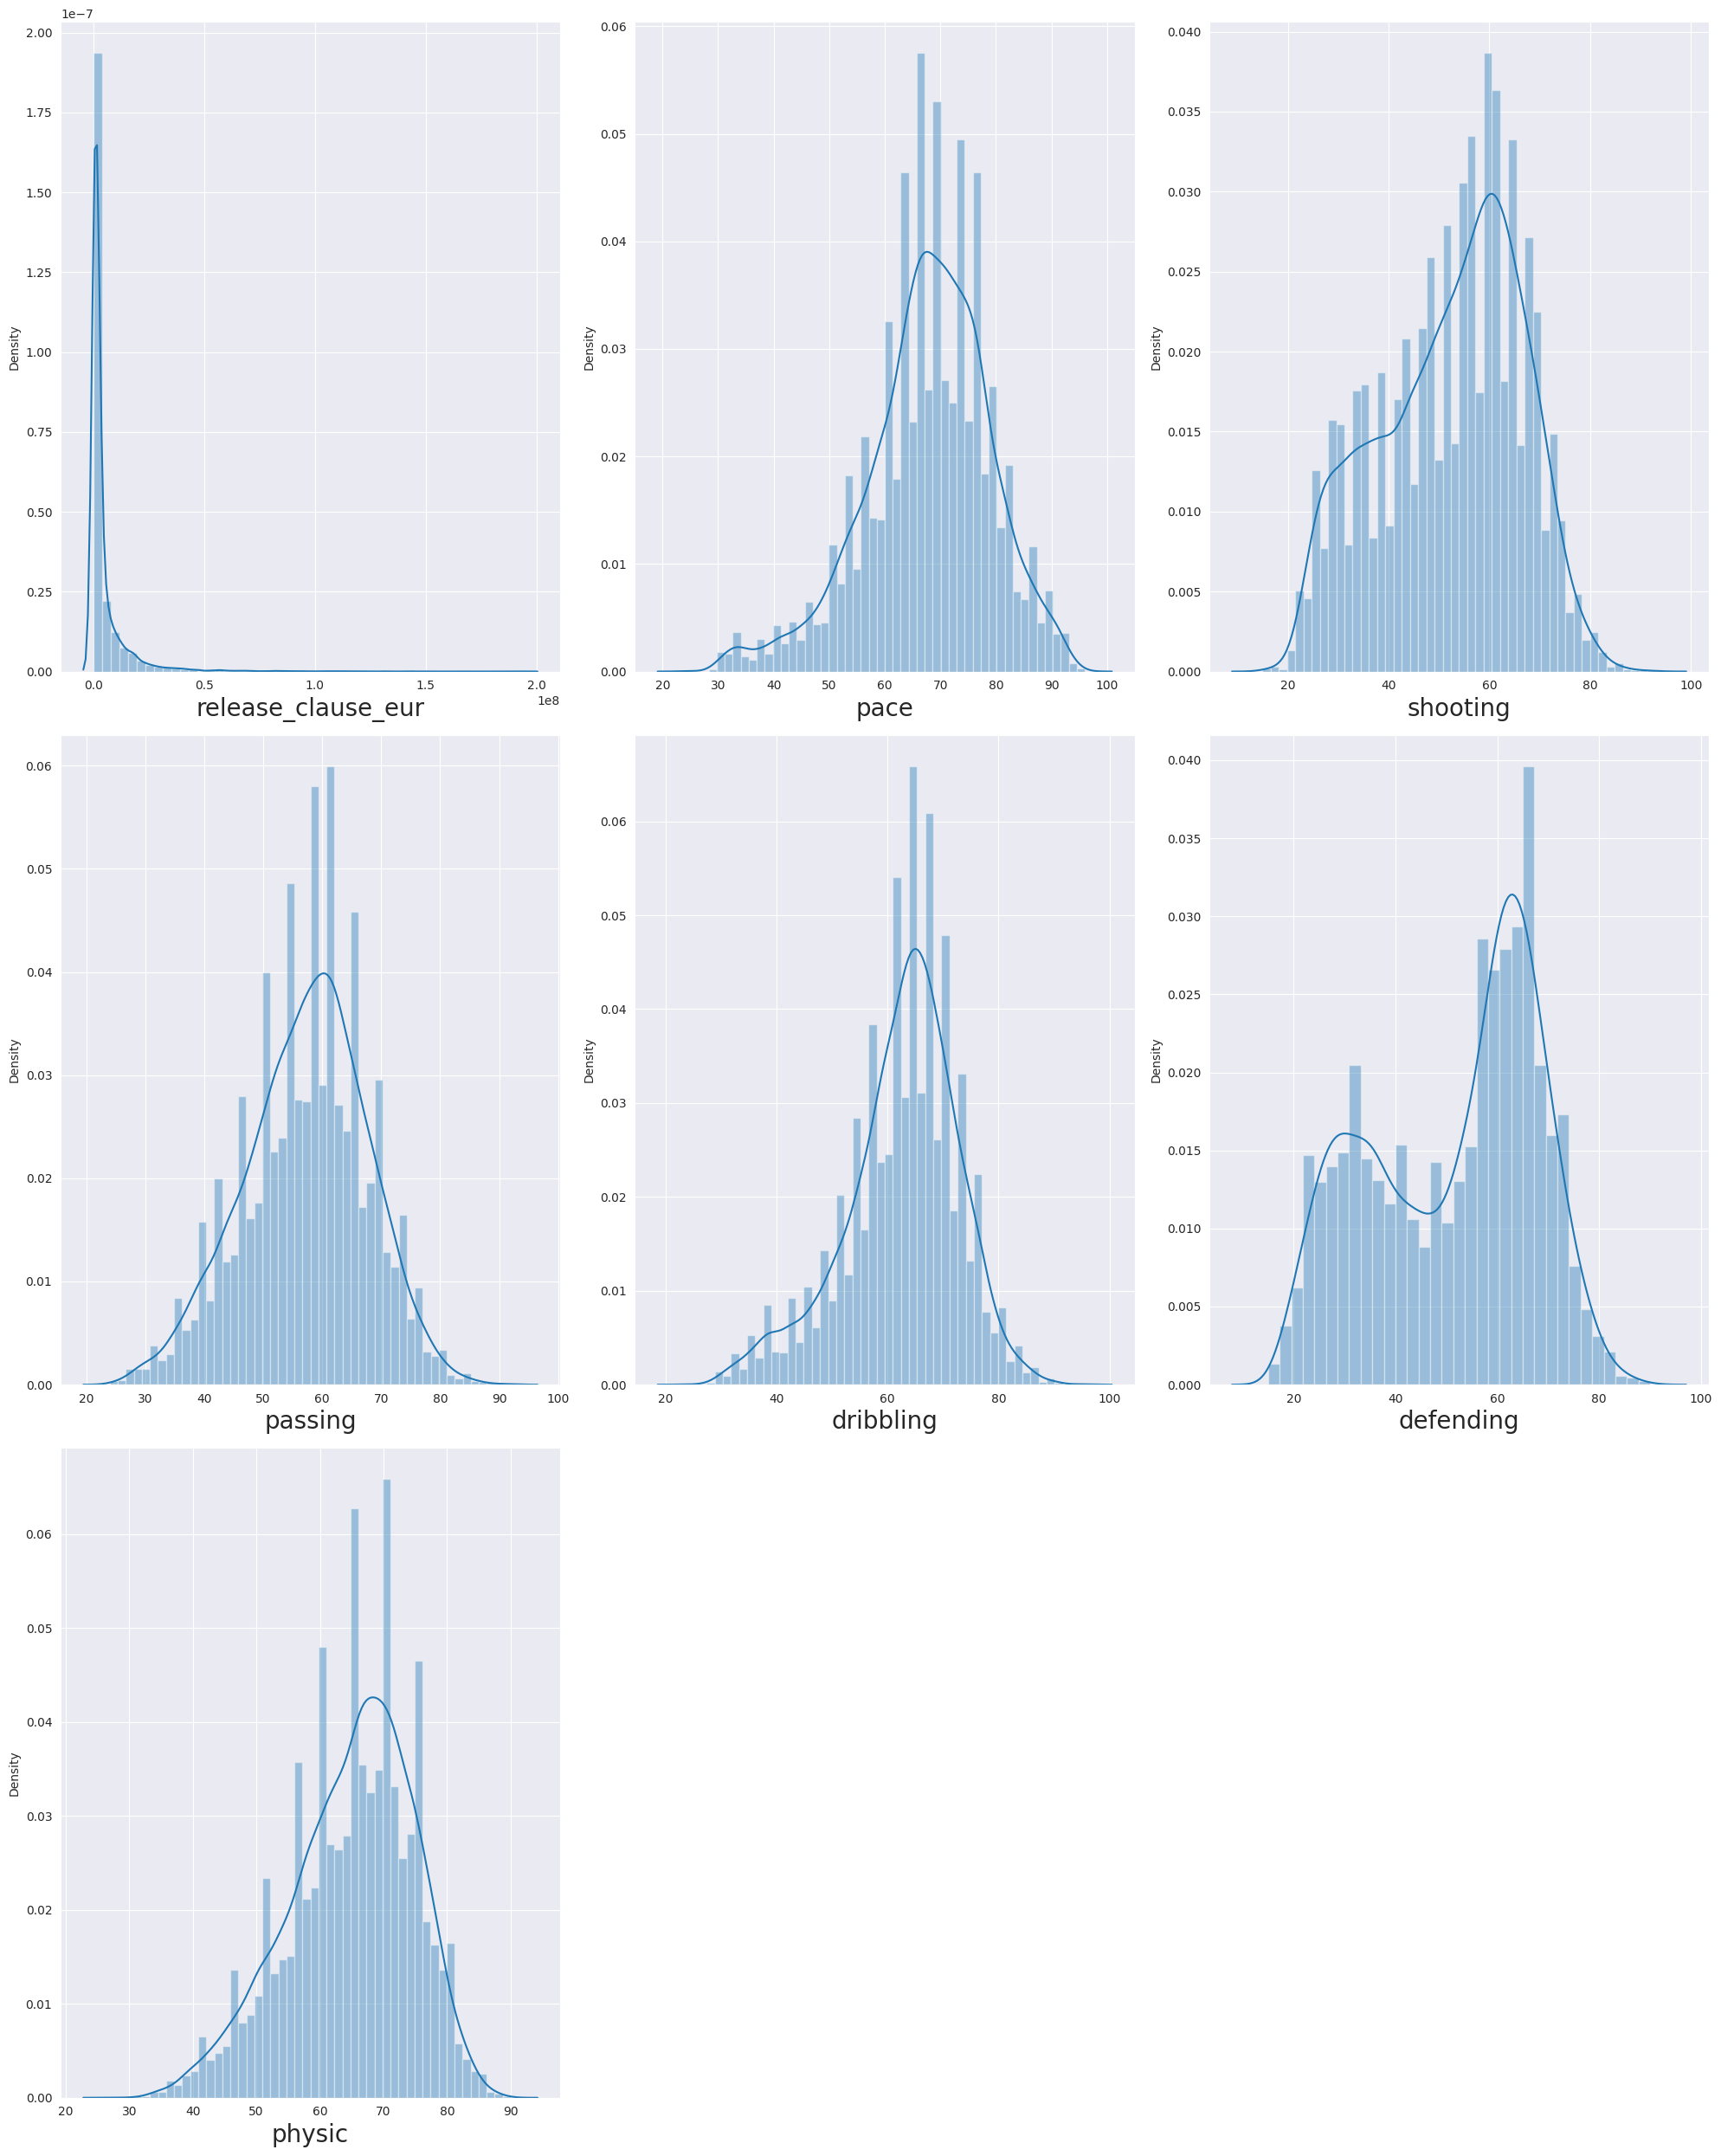

In [ ]:
dist = df[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(20,25))
plotno = 1

for column in dist:
    if plotno<=8:
        plt.subplot(3,3,plotno)
        sns.distplot(x=dist[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

In [8]:
# Impute missing value using median because distribution is not normal
df.loc[df['release_clause_eur'].isnull()==True,'release_clause_eur']=df['release_clause_eur'].median()
df.loc[df['pace'].isnull()==True,'pace']=df['pace'].median()
df.loc[df['shooting'].isnull()==True,'shooting']=df['shooting'].median()
df.loc[df['passing'].isnull()==True,'passing']=df['passing'].median()
df.loc[df['dribbling'].isnull()==True,'dribbling']=df['dribbling'].median()
df.loc[df['defending'].isnull()==True,'defending']=df['defending'].median()
df.loc[df['physic'].isnull()==True,'physic']=df['physic'].median()

In [9]:
# Check missing value after imputation
print('release_clause_eur:',df['release_clause_eur'].isnull().sum())
print('pace:',df['pace'].isnull().sum())
print('shooting:',df['shooting'].isnull().sum())
print('passing:',df['passing'].isnull().sum())
print('dribbling:',df['dribbling'].isnull().sum())
print('defending:',df['defending'].isnull().sum())
print('physic:',df['physic'].isnull().sum())

release_clause_eur: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


### **Categorical**

In [10]:
df.loc[df['team_position'].isnull(),'team_position']=df['team_position'].mode()[0]

In [11]:
df['team_position'].isnull().sum()

np.int64(0)

## Handling Categorical Data
* In this data only preferred foot and team position feature is important and remaining all feature is unique.
#### 1.Preferred Foot

In [12]:
df['preferred_foot'].value_counts()

preferred_foot
Right    13960
Left      4318
Name: count, dtype: int64

In [13]:
df['preferred_foot']=df.preferred_foot.map({'Right':1,'Left':0})

In [14]:
df.preferred_foot.unique()

array([0, 1])

#### 2.Team Position

In [15]:
df.team_position.value_counts()


team_position
SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
LB      560
RB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
LWB      58
RWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [16]:
# Use mannual encoding because lots of labels avialble
df.team_position = df.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

In [17]:
df.team_position.unique()

array([ 9, 10, 16, 26, 20, 24, 21, 11, 14, 18, 25, 19, 17,  0, 28, 22, 12,
       23, 15, 27,  4, 13,  2,  7,  8,  1,  3,  6,  5])

#### **OUTLIER HANDLING**
* In this data we are handle only important feature outlier, because the remaining feature is unique or some feature is not required to handle outlier

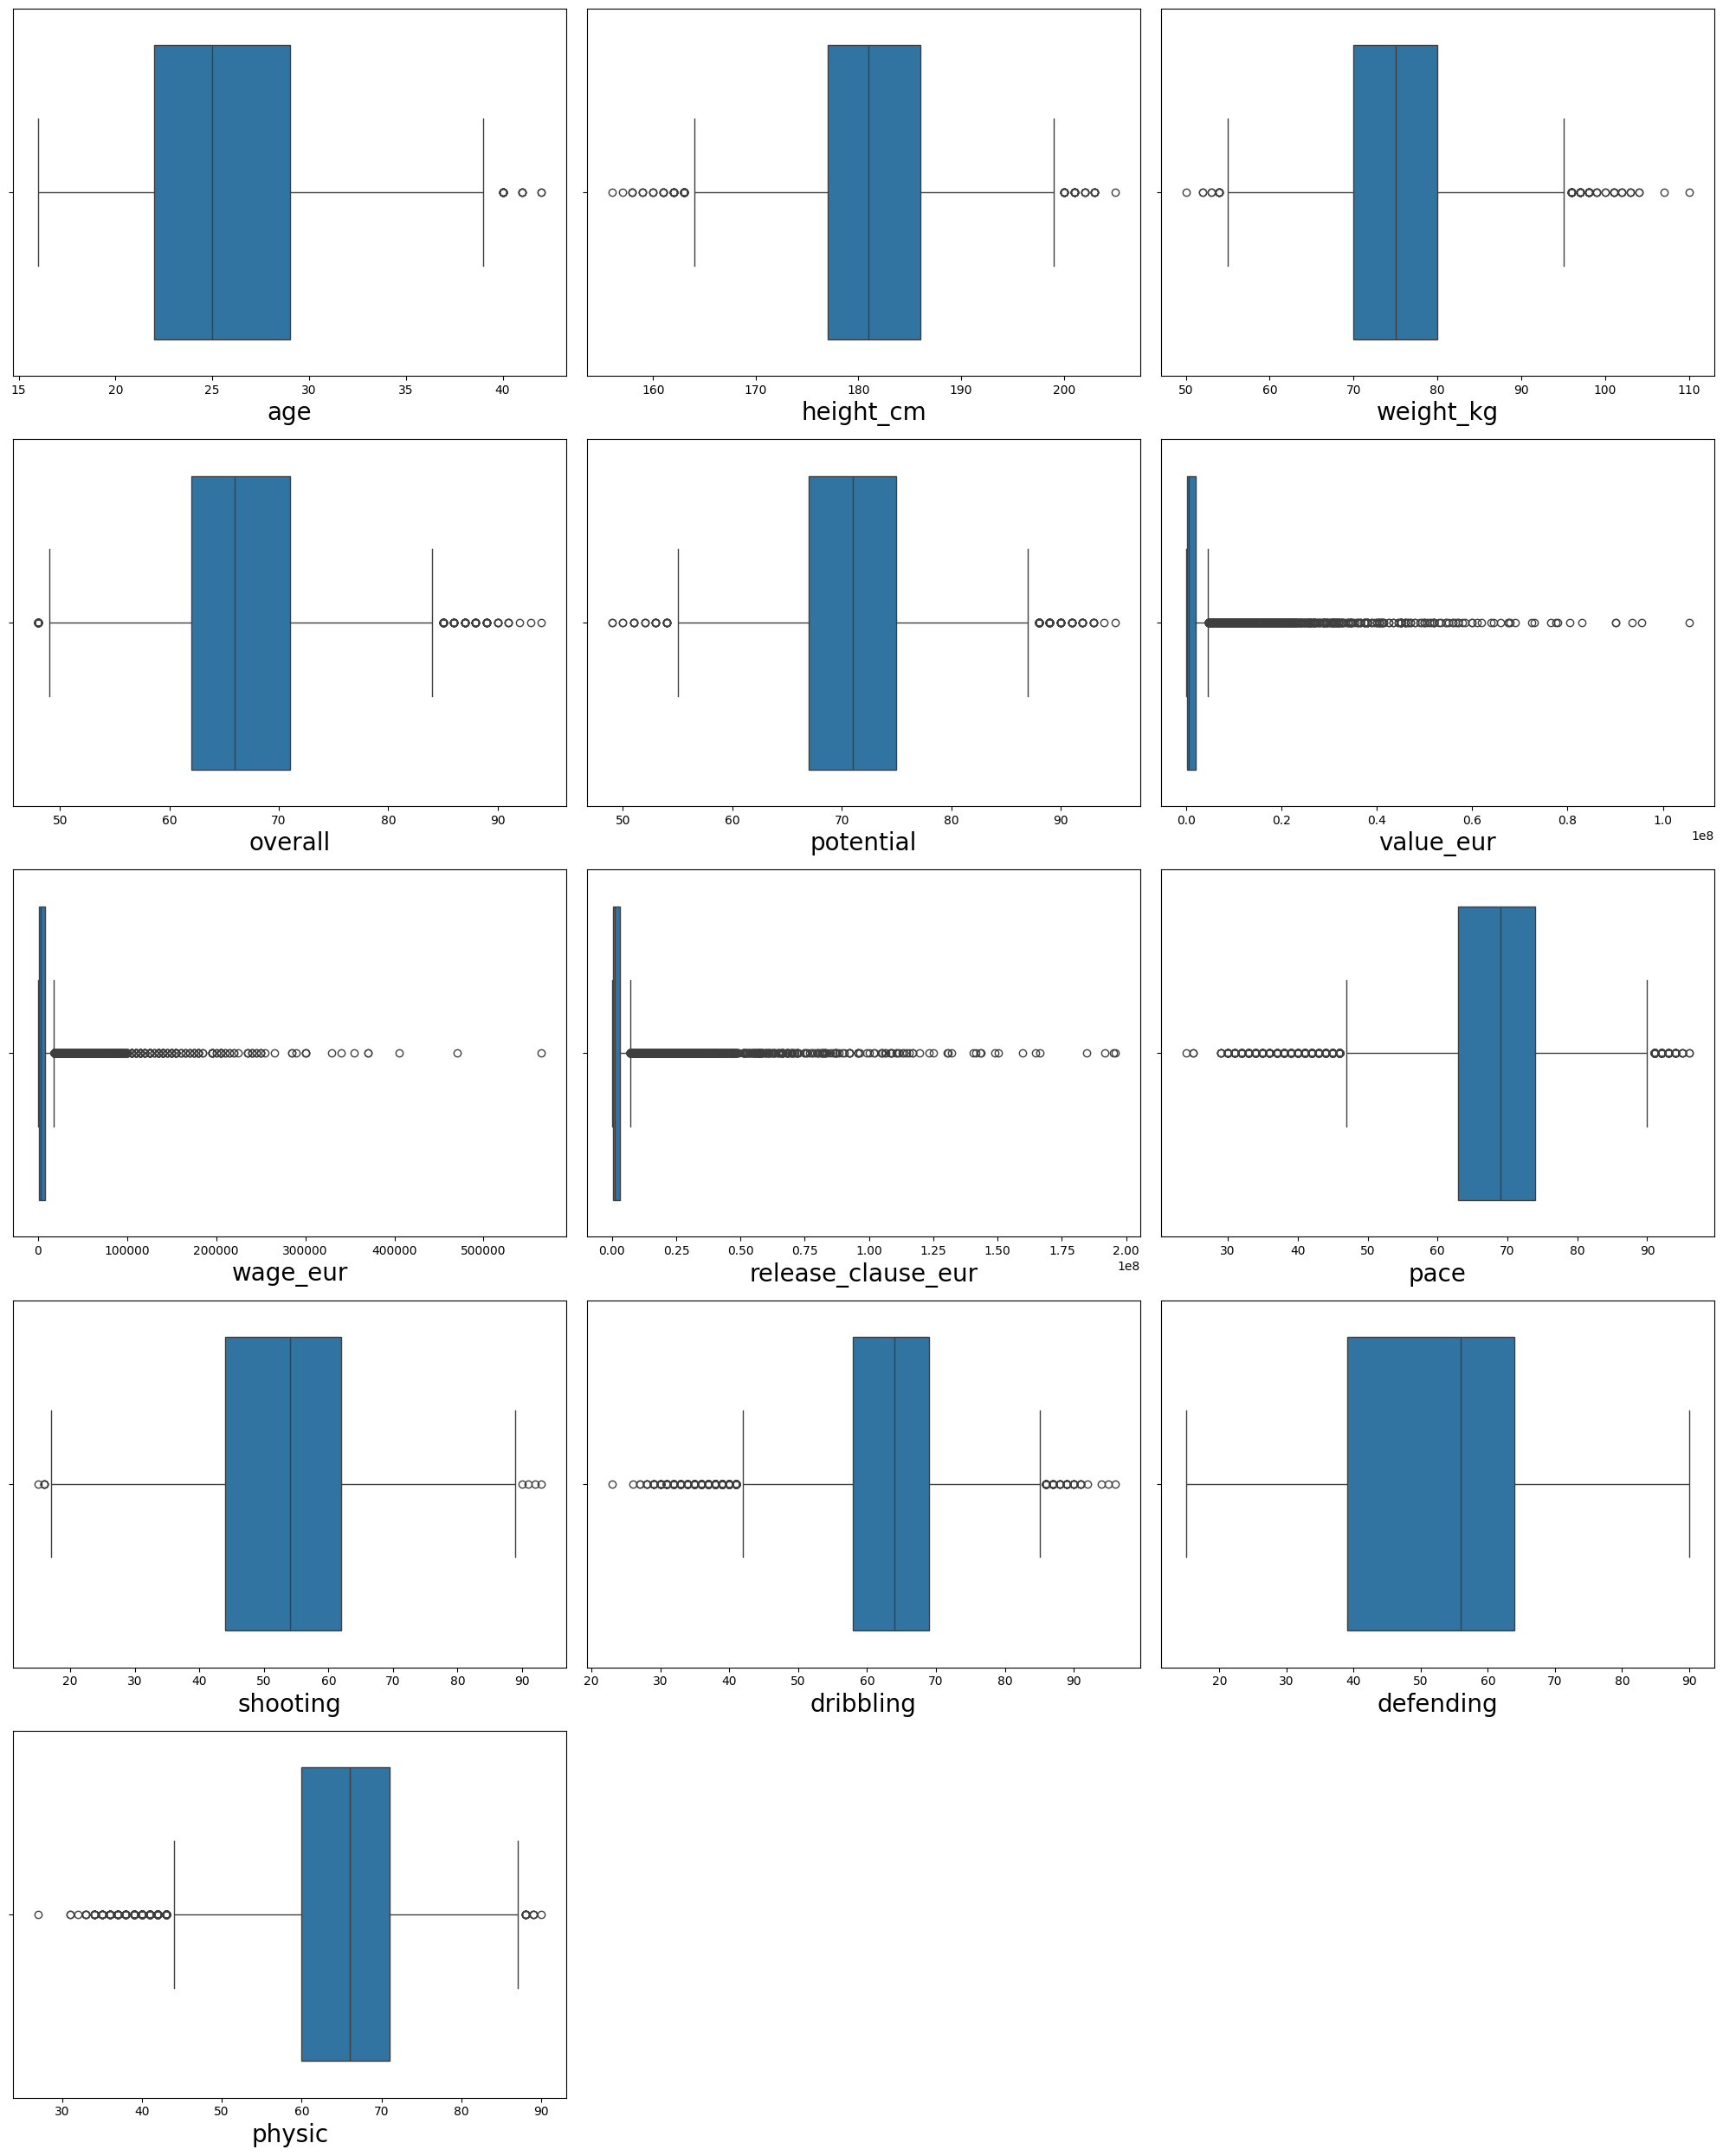

In [18]:
out = df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25))
plotno = 1

for column in out:
    if plotno<=16:
        plt.subplot(5,3,plotno)
        sns.boxplot(x=out[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

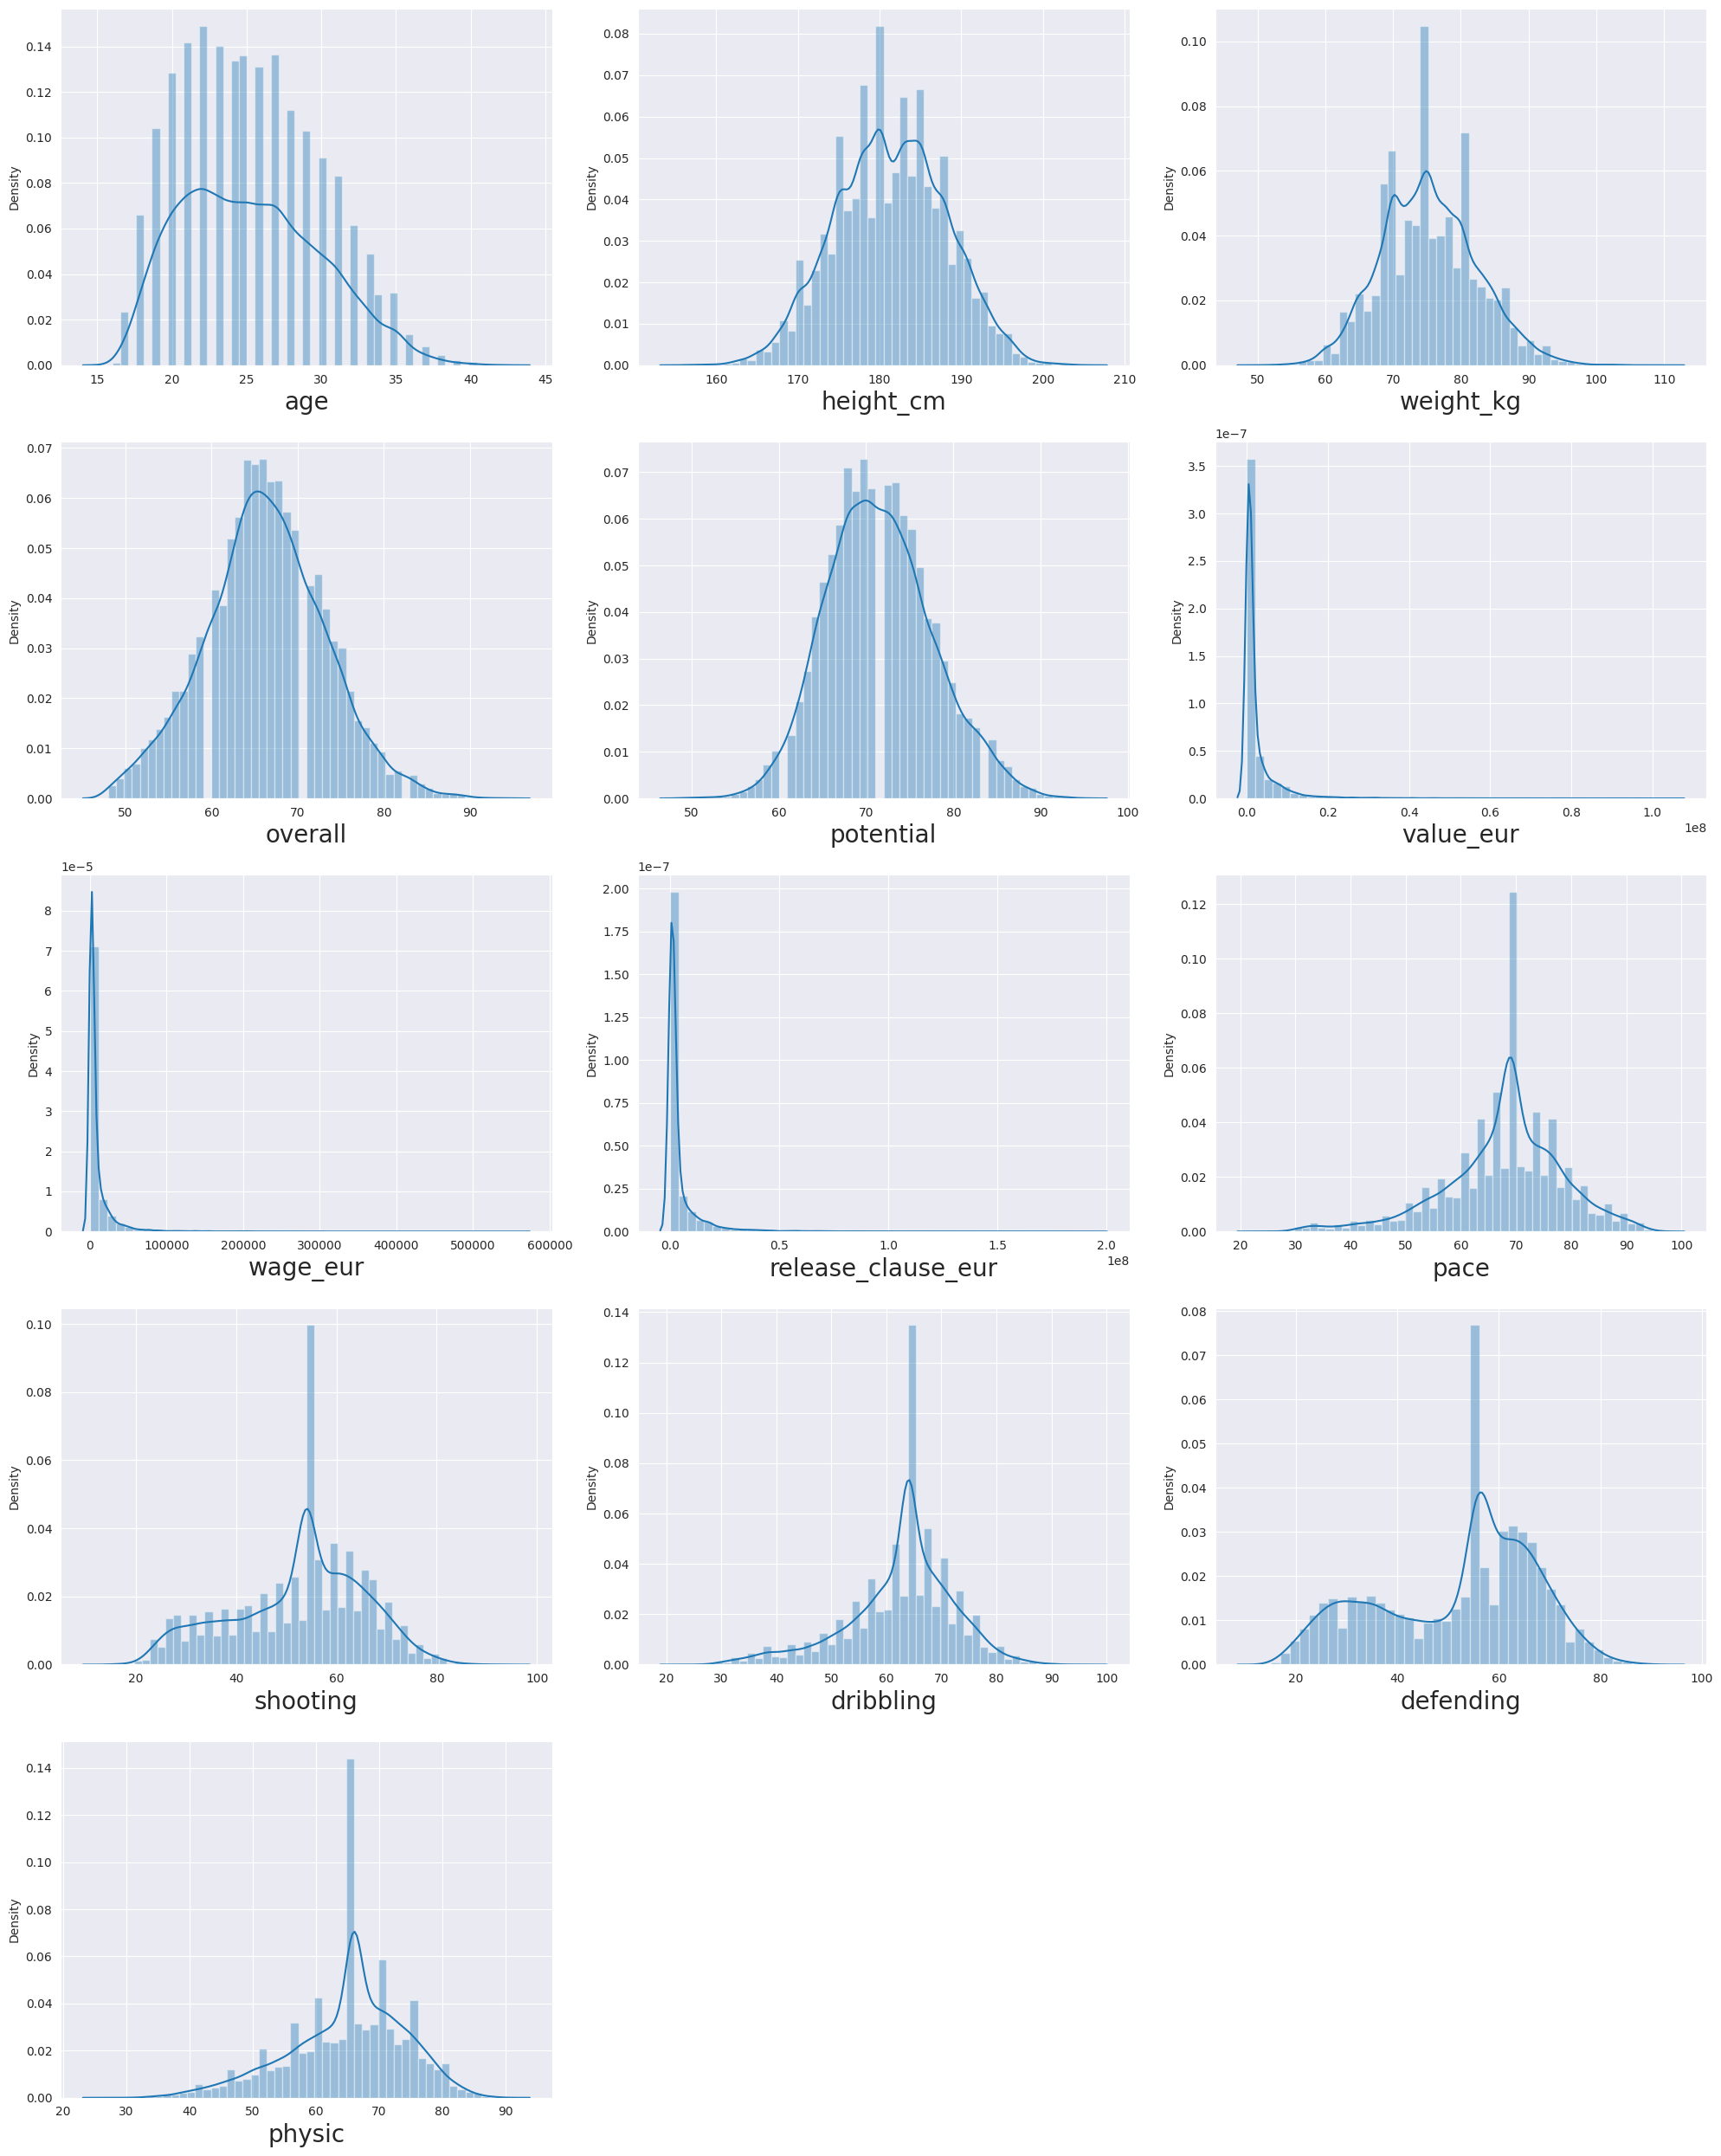

In [ ]:
dist1 = df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25))
plotno=1
for column in dist1:
    if plotno<=15:
        plt.subplot(5,3,plotno)
        sns.distplot(x=out[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

* **Here age,height_cm,weight_kg,overall,potential is follow a normal distribution so we are empherical rule and remaining feature we use IQR**

 1. **Age**

In [19]:
upper_bound = df.age.mean() + 3*df.age.std()
print("Upper bound:",upper_bound)
lower_bound = df.age.mean() - 3*df.age.std()
print("Lower bound:",lower_bound)


Upper bound: 39.25418488202056
Lower bound: 11.312397895088532


In [20]:
len(df.loc[df['age']>upper_bound])/len(df)*100

0.10395010395010396

In [21]:
# impute outlier with mean because feature follow a normal distribution and continous data
df.loc[df['age'] > upper_bound,'age']=df['age'].mean()

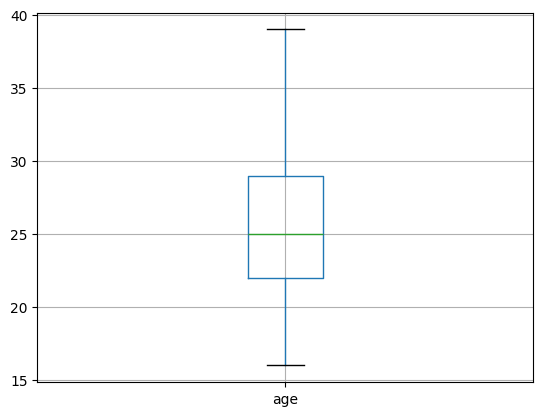

In [22]:
df.boxplot('age')
plt.show()

* Outliers impute successfully

2. **Heigth**

In [23]:
upper_bound = df.height_cm.mean() + 3*df.height_cm.std()
print("Upper bound:",upper_bound)
lower_bound = df.height_cm.mean() - 3*df.height_cm.std()
print("Lower bound:",lower_bound)

Upper bound: 201.6330681374958
Lower bound: 161.09129995529332


In [24]:
len(df.loc[df['height_cm']>upper_bound])/len(df)*100

0.06018163912900754

In [25]:
len(df.loc[df['height_cm']<lower_bound])/len(df)*100

0.0875369296421928

In [26]:
 # impute outlier with mean because feature follow a normal distribution and continous data
df.loc[df['height_cm'] < lower_bound,'height_cm']=df['height_cm'].mean()
df.loc[df['height_cm'] > upper_bound,'height_cm']=df['height_cm'].mean()

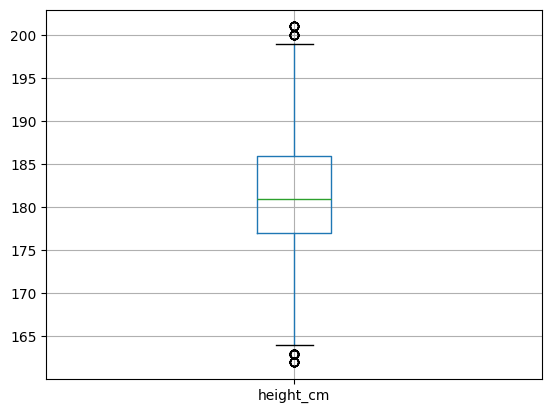

In [27]:
df.boxplot('height_cm')
plt.show()

* Outlier is impute but box plot are show outlier

3. **Weight**

In [28]:
upper_bound = df.weight_kg.mean() + 3*df.weight_kg.std()
print("Upper bound:",upper_bound)
lower_bound = df.weight_kg.mean() - 3*df.weight_kg.std()
print("Lower bound:",lower_bound)

Upper bound: 96.41957385582987
Lower bound: 54.13311243369853


In [29]:
len(df.loc[df['weight_kg']>upper_bound])/len(df)*100

0.22431338220811906

In [30]:
len(df.loc[df['weight_kg']<lower_bound])/len(df)*100

0.06018163912900754

In [31]:
# impute outlier with mean because feature follow a normal distribution and continous data
df.loc[df['weight_kg'] < lower_bound,'weight_kg']=df['weight_kg'].mean()
df.loc[df['weight_kg'] > upper_bound,'weight_kg']=df['weight_kg'].mean()

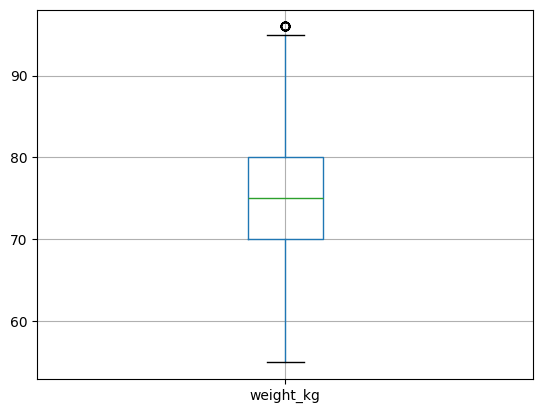

In [32]:
df.boxplot('weight_kg')
plt.show()

* Outlier is removed successfully

4. **Overall**

In [33]:
upper_bound = df.overall.mean() + 3*df.overall.std()
print("Upper bound:",upper_bound)
lower_bound = df.overall.mean() - 3*df.overall.std()
print("Lower bound:",lower_bound)

Upper bound: 87.09485374672605
Lower bound: 45.395134216946126


In [34]:
len(df.loc[df['overall'] > upper_bound])/18278*100

0.218842324105482

In [35]:
 # impute outlier with mean because feature follow a normal distribution and continous data
df.loc[df['overall'] > upper_bound,'overall']=df['overall'].mean()

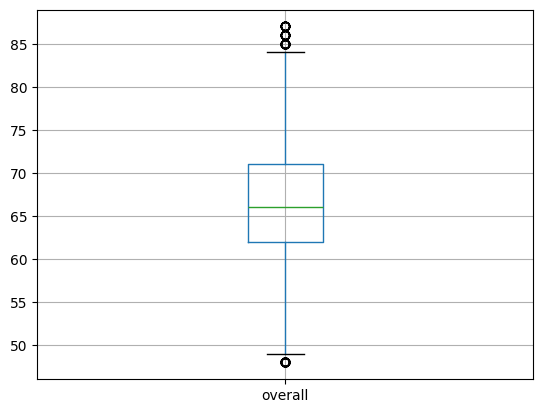

In [36]:
df.boxplot('overall')
plt.show()

5. **Potential**

In [37]:
upper_bound = df.potential.mean() + 3*df.potential.std()
print("Upper bound:",upper_bound)
lower_bound = df.potential.mean() - 3*df.potential.std()
print("Lower bound:",lower_bound)

Upper bound: 89.96589419280835
Lower bound: 53.12787974307086


In [38]:
len(df.loc[df['potential'] > upper_bound])/18278*100

0.21337126600284498

In [39]:
len(df.loc[df['potential'] < lower_bound])/18278*100

0.09300798774482985

In [40]:
 # impute outlier with mean because feature follow a normal distribution and continous data
df.loc[df['potential'] < lower_bound,'potential']=df['potential'].mean()
df.loc[df['potential'] > upper_bound,'potential']=df['potential'].mean()

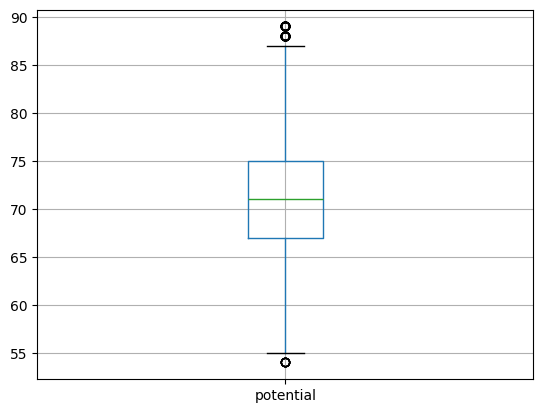

In [41]:
df.boxplot('potential')
plt.show()

#### **IQR**

1. **Value_eur**

In [42]:
q1=df['value_eur'].quantile(0.25)
q3=df['value_eur'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)
print("IQR:",iqr)

lower bound: -2337500.0
upper bound: 4762500.0
IQR: 1775000.0


In [43]:
len(df.loc[df['value_eur'] > upper_bound])/18278*100

13.737826895721634

* Here outlier is more than 5% so we not impute the outlier

2. **Wage_eur**

In [44]:
q1=df['wage_eur'].quantile(0.25)
q3=df['wage_eur'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)
print("IQR:",iqr)

lower bound: -9500.0
upper bound: 18500.0
IQR: 7000.0


In [45]:
len(df.loc[df['wage_eur'] > upper_bound])/18278*100

12.911697122223437

* Here also outlier is more than 5% so we not impute the outlier

3. **Release_clause_eur**

In [46]:
q1=df['release_clause_eur'].quantile(0.25)
q3=df['release_clause_eur'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)
print("IQR:",iqr)

lower bound: -3310000.0
upper bound: 7106000.0
IQR: 2604000.0


In [47]:
len(df.loc[df['release_clause_eur'] > upper_bound])/18278*100

15.368202210307475

* Here also outlier is more than 5% so we not impute the outlier

4. **Pace**

In [48]:
q1=df['pace'].quantile(0.25)
q3=df['pace'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)
print("IQR:",iqr)

lower bound: 46.5
upper bound: 90.5
IQR: 11.0


In [49]:
len(df.loc[df['pace'] > upper_bound])/18278*100

1.0285589232957655

In [50]:
len(df.loc[df['pace'] < lower_bound])/18278*100

4.19083050661998

In [51]:
# impute outlier both side
df.loc[df['pace'] < lower_bound,'pace'] = df['pace'].median()
df.loc[df['pace'] > upper_bound,'pace'] = df['pace'].median()

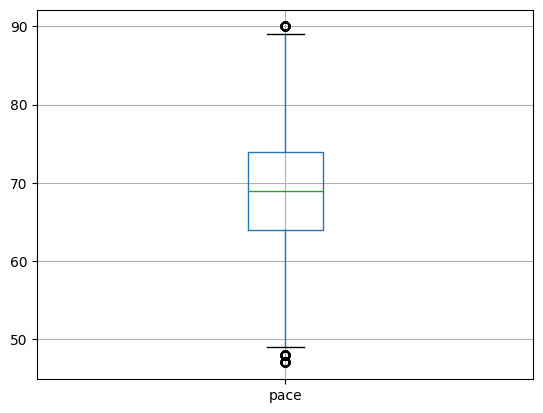

In [52]:
df.boxplot('pace')
plt.show()

5. **Shooting**

In [53]:
q1=df['shooting'].quantile(0.25)
q3=df['shooting'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)
print("IQR:",iqr)

lower bound: 17.0
upper bound: 89.0
IQR: 18.0


In [54]:
len(df.loc[df['shooting'] > upper_bound])/18278*100

0.0218842324105482

In [55]:
len(df.loc[df['shooting'] < lower_bound])/18278*100

0.02735529051318525

In [56]:
# impute outlier both side
df.loc[df['shooting'] < lower_bound,'shooting'] = df['shooting'].median()
df.loc[df['shooting'] > upper_bound,'shooting'] = df['shooting'].median()

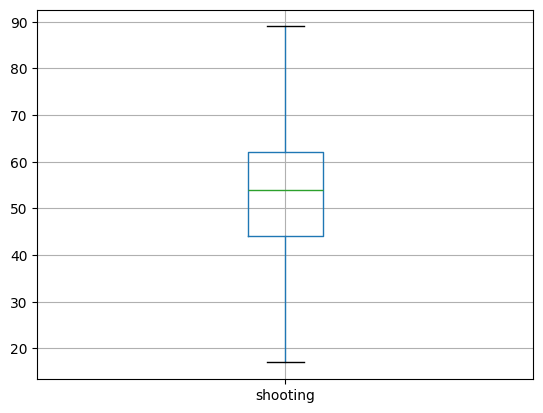

In [57]:
df.boxplot("shooting")
plt.show()

7. **Dribbling**

In [58]:
q1=df['dribbling'].quantile(0.25)
q3=df['dribbling'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)
print("IQR:",iqr)

lower bound: 41.5
upper bound: 85.5
IQR: 11.0


In [59]:
len(df.loc[df['dribbling'] > upper_bound])/18278*100

0.4048582995951417

In [60]:
len(df.loc[df['dribbling'] < lower_bound])/18278*100

4.048582995951417

In [61]:
df.loc[df['dribbling'] < lower_bound,'dribbling'] = df['dribbling'].median()

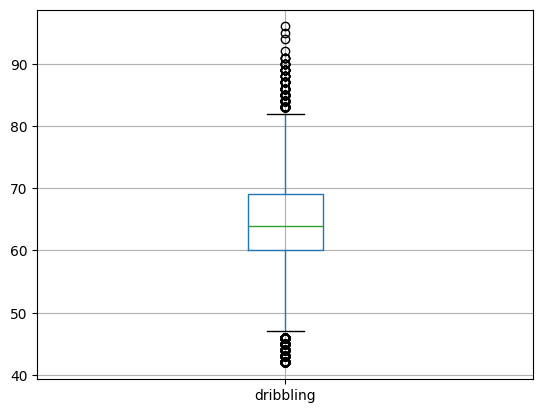

In [62]:
df.boxplot('dribbling')
plt.show()

8. **Physic**

In [63]:
q1=df['physic'].quantile(0.25)
q3=df['physic'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)
print("IQR:",iqr)

lower bound: 43.5
upper bound: 87.5
IQR: 11.0


In [64]:
len(df.loc[df['physic'] > upper_bound])/18278*100

0.0656526972316446

In [65]:
len(df.loc[df['physic'] < lower_bound])/18278*100

2.303315461210198

In [66]:
df.loc[df['physic'] > upper_bound ,'physic'] = df['physic'].median()
df.loc[df['physic'] < lower_bound ,'physic'] = df['physic'].median()

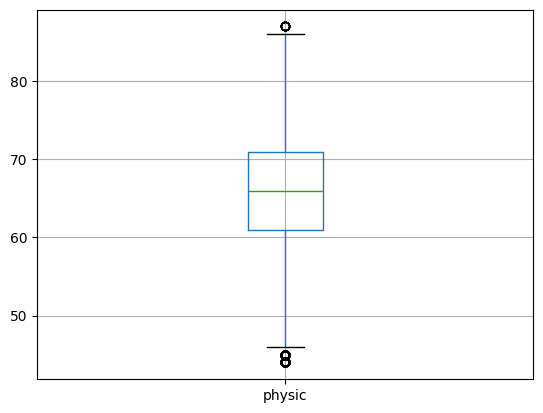

In [67]:
df.boxplot('physic')
plt.show()

* Outlier is impute successfull, this outlier is shown after impute the outlier.

#### Checking Distribution after impute the Outliers

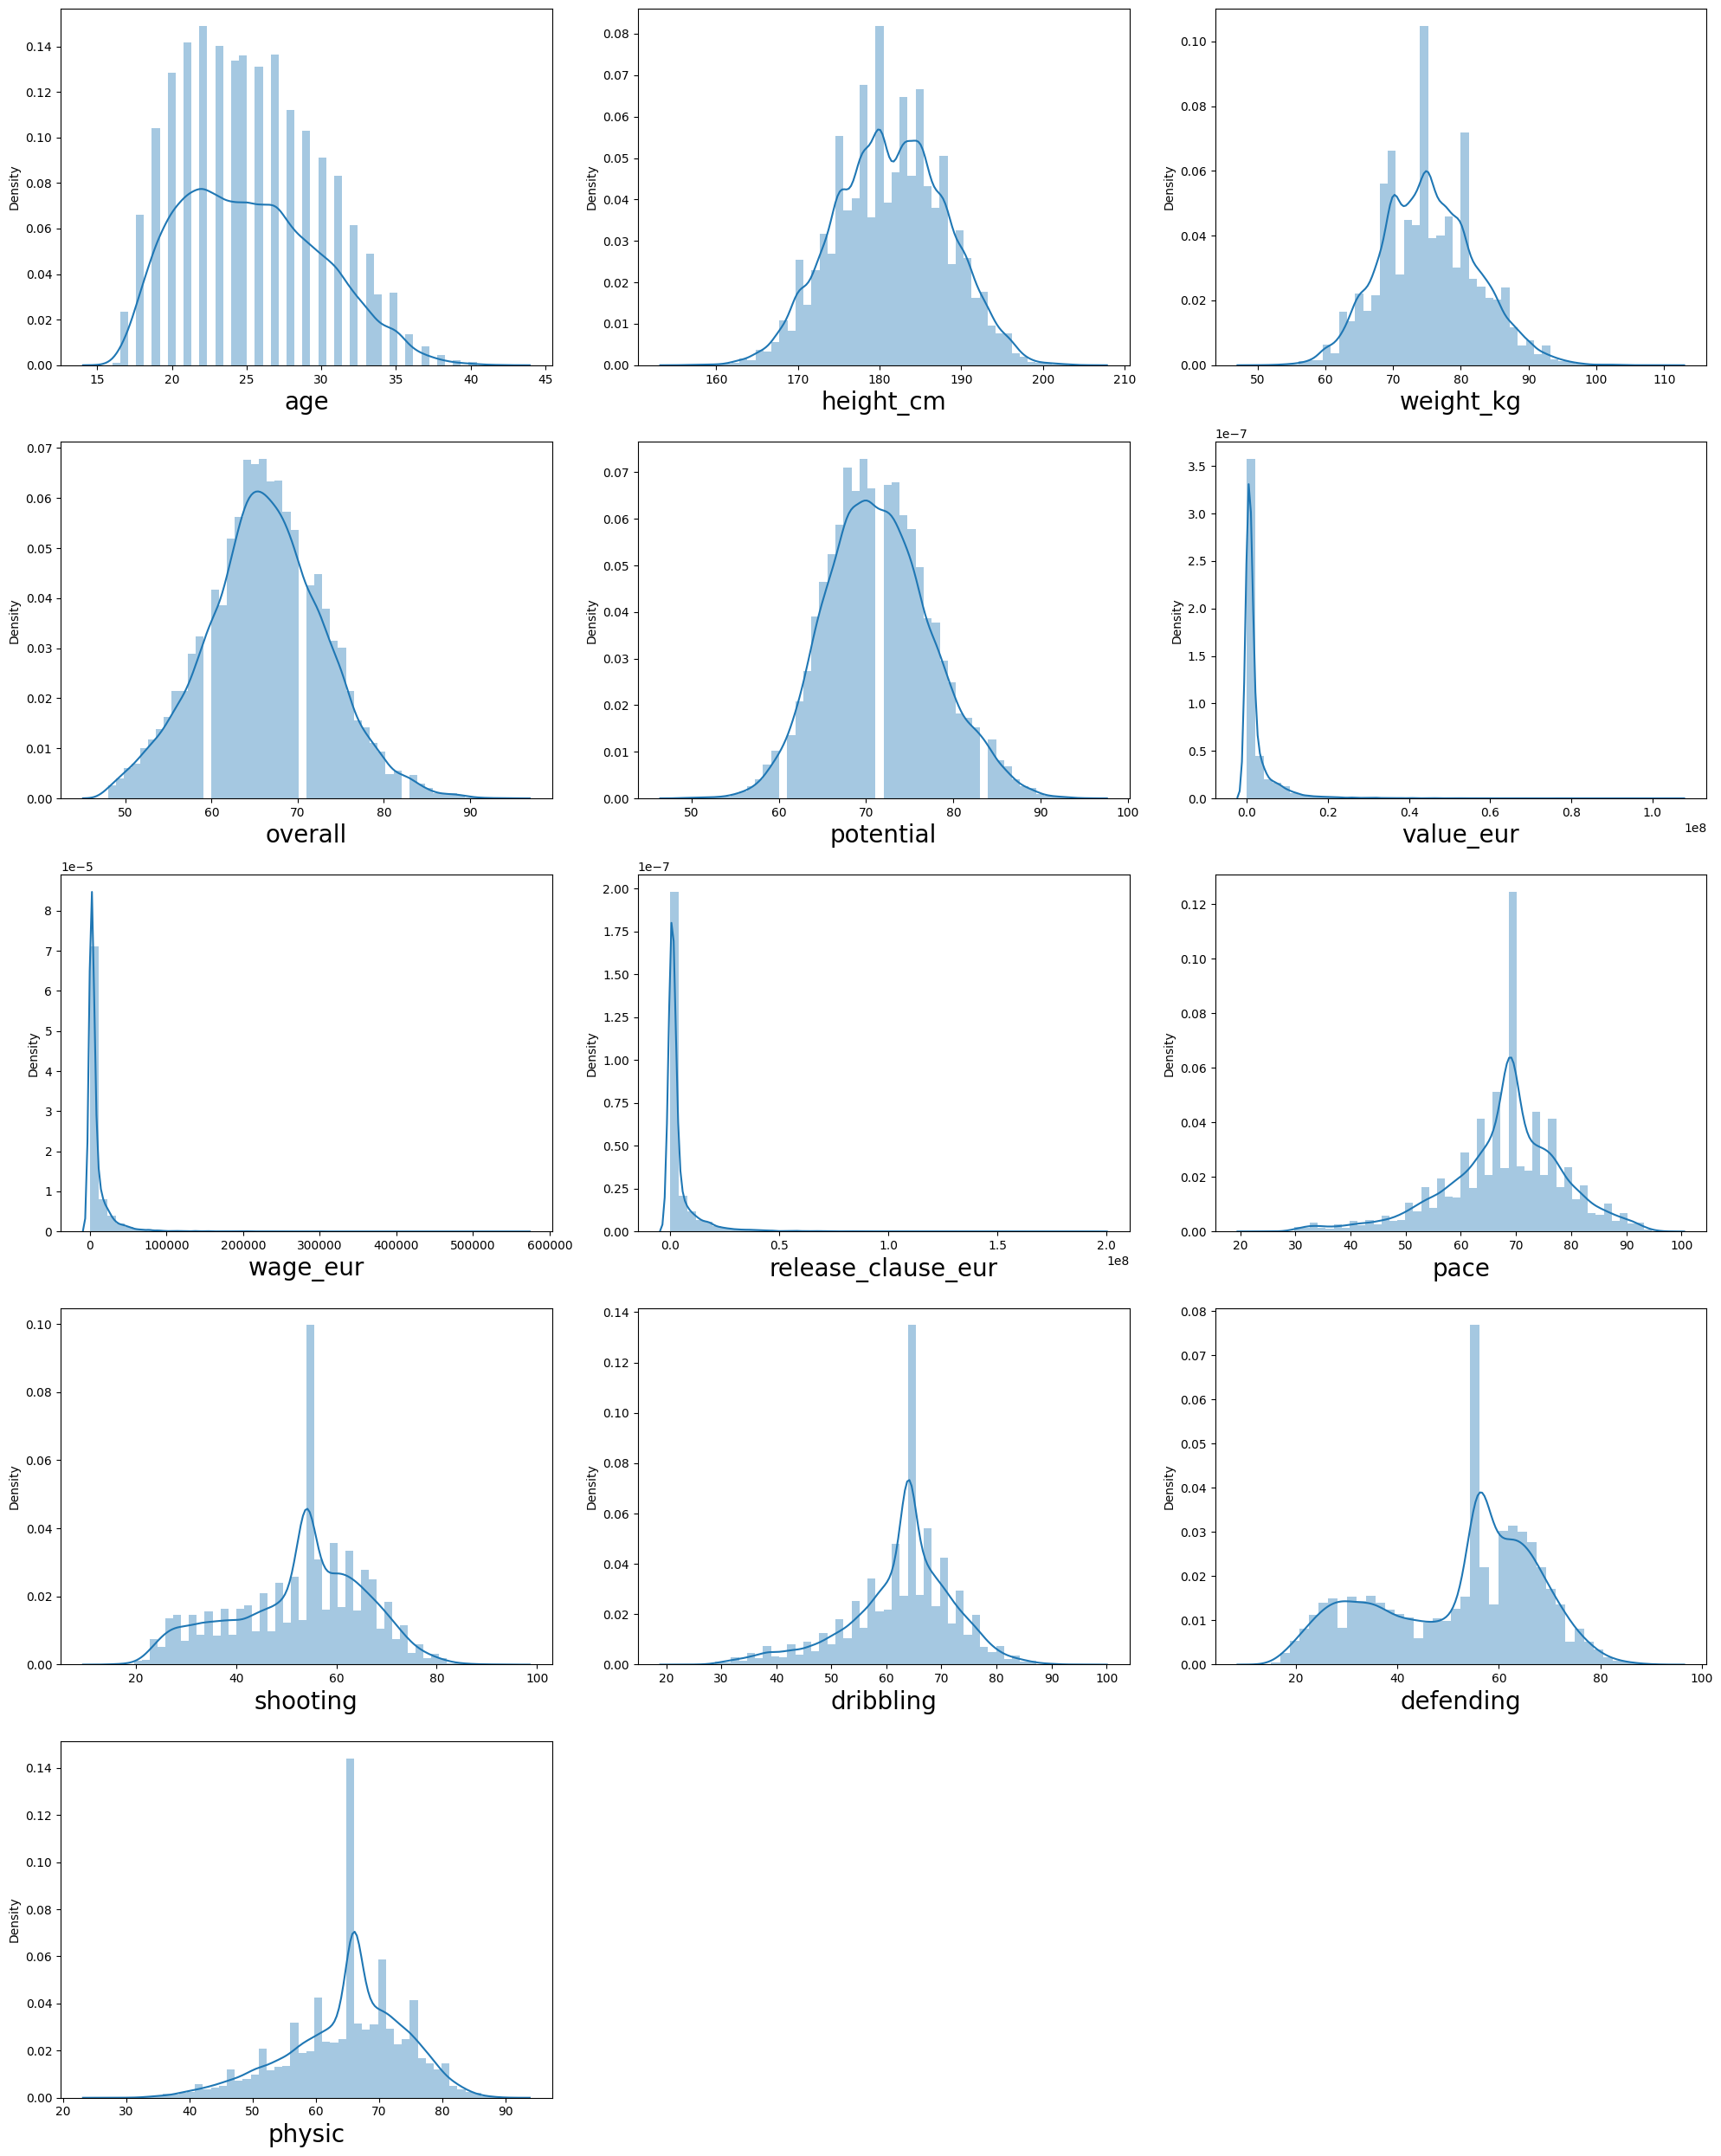

In [68]:
dist1 = df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25))
plotno=1
for column in dist1:
    if plotno<=15:
        plt.subplot(5,3,plotno)
        sns.distplot(x=out[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

## Feature Scaling

#### MIN-MAX SCALING
* Scale the feature between 0 to 1
* Only scale the continous feature
* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Object Creation
df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(df[['age','height_cm','weight_kg','overall','potential',
                'value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration',
                'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
                'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

### **Handling Missing and Irrelevant Columns: Dropping Unnecessary Data for Better Analysis**

* Here we are going to drop unique column as well as lots of missing value column.
* The column ls,st,rs,lw,cf etc.. are playing position in the game and the data in this columns is basically the potential of the player if were to play in that position, so we assume the player only playes with the team position and we will drop this column

In [70]:
df.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [71]:
df.head(1)

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  0.695652   0.205128   0.414634  0.46782   0.501872   0.905213       1.0   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
0               0                         5          4            4   

   release_clause_eur  team_position      pace  shooting  passing  dribbling  \
0                 1.0              9  0.930233  0.513889      1.0        1.0   

   defending    physic  attacking_crossing  attacking_finishing  \
0       0.32  0.511628            0.943182                  1.0   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.738636                      1.0           0.977011   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0              1.0     0.988636                1.0                 1.0   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                 1.0               0.929412               0.858824   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377               1.0   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0              0.453488                  0.41573               0.989247   

   mentality_vision  mentality_penalties  mentality_composure  \
0               1.0                  0.8                  1.0   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0           0.344086                   0.367816                  0.264368   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0             0.05618               0.10989             0.152174   

   goalkeeping_positioning  goalkeeping_reflexes  
0                 0.144444              0.076923

## Feature Selection

In [ ]:
df.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.081825   0.235507  0.465942   
height_cm                   0.081825   1.000000   0.758767  0.040680   
weight_kg                   0.235507   0.758767   1.000000  0.152619   
overall                     0.465942   0.040680   0.152619  1.000000   
potential                  -0.263493  -0.002573  -0.015062  0.627276   
value_eur                   0.083345   0.010298   0.049439  0.568768   
wage_eur                    0.152189   0.019599   0.063460  0.496974   
preferred_foot              0.006318   0.083465   0.076584 -0.035088   
international_reputation    0.256318   0.038448   0.089659  0.431482   
weak_foot                   0.073591  -0.173893  -0.126302  0.227064   
skill_moves                 0.048315  -0.427502  -0.347747  0.400131   
release_clause_eur          0.068669   0.011371   0.045490  0.539411   
team_position              -0.162284   0.115193   0.065831 -0.272091   
pace                       -0.066880  -0.322364  -0.271491  0.185569   
shooting                    0.223736  -0.166607  -0.073823  0.454310   
passing                     0.307117  -0.251701  -0.157103  0.627560   
dribbling                   0.143613  -0.307260  -0.220801  0.542204   
defending                   0.245411   0.226193   0.224703  0.303984   
physic                      0.377200   0.413394   0.488847  0.450878   
attacking_crossing          0.131539  -0.497228  -0.396941  0.389289   
attacking_finishing         0.081372  -0.374449  -0.288350  0.340242   
attacking_heading_accuracy  0.152823   0.011683   0.045239  0.347073   
attacking_short_passing     0.138928  -0.369700  -0.285850  0.500757   
attacking_volleys           0.145669  -0.349417  -0.257122  0.391496   
skill_dribbling             0.020140  -0.498802  -0.410895  0.370315   
skill_curve                 0.144337  -0.446248  -0.345110  0.414414   
skill_fk_accuracy           0.192761  -0.408898  -0.306789  0.387645   
skill_long_passing          0.186275  -0.333394  -0.256859  0.484578   
skill_ball_control          0.091374  -0.423454  -0.335107  0.455734   
movement_acceleration      -0.148783  -0.556172  -0.487739  0.184868   
movement_sprint_speed      -0.139705  -0.473235  -0.416660  0.197523   
movement_agility           -0.019365  -0.630700  -0.538697  0.251562   
movement_reactions          0.464196  -0.016994   0.089638  0.853851   
movement_balance           -0.087483  -0.787144  -0.662585  0.102954   
power_shot_power            0.263674  -0.172917  -0.055172  0.564511   
power_jumping               0.186651  -0.037795   0.036255  0.265549   
power_stamina               0.121348  -0.290376  -0.213391  0.370892   
power_strength              0.341898   0.532801   0.611366  0.361541   
power_long_shots            0.164369  -0.382526  -0.275923  0.424567   
mentality_aggression        0.262180  -0.044891   0.033683  0.402270   
mentality_interceptions     0.198394  -0.053660  -0.024554  0.318321   
mentality_positioning       0.089510  -0.444022  -0.351586  0.354784   
mentality_vision            0.196565  -0.369987  -0.279621  0.503976   
mentality_penalties         0.143095  -0.333836  -0.242053  0.344874   
mentality_composure         0.370790  -0.157882  -0.053074  0.713519   
defending_marking           0.159563  -0.076986  -0.045121  0.305655   
defending_standing_tackle   0.119566  -0.068870  -0.048723  0.253197   
defending_sliding_tackle    0.104168  -0.077490  -0.060501  0.223361   
goalkeeping_diving          0.107007   0.366300   0.334624 -0.017887   
goalkeeping_handling        0.109208   0.366083   0.336503 -0.018431   
goalkeeping_kicking         0.108890   0.363585   0.333002 -0.022055   
goalkeeping_positioning     0.117237   0.365901   0.337143 -0.011307   
goalkeeping_reflexes        0.108485   0.366147   0.335988 -0.017552   

                            potential  value_eur  wage_eur  preferred_foot  \
age                         -0.263493   0.083345  0.152189        

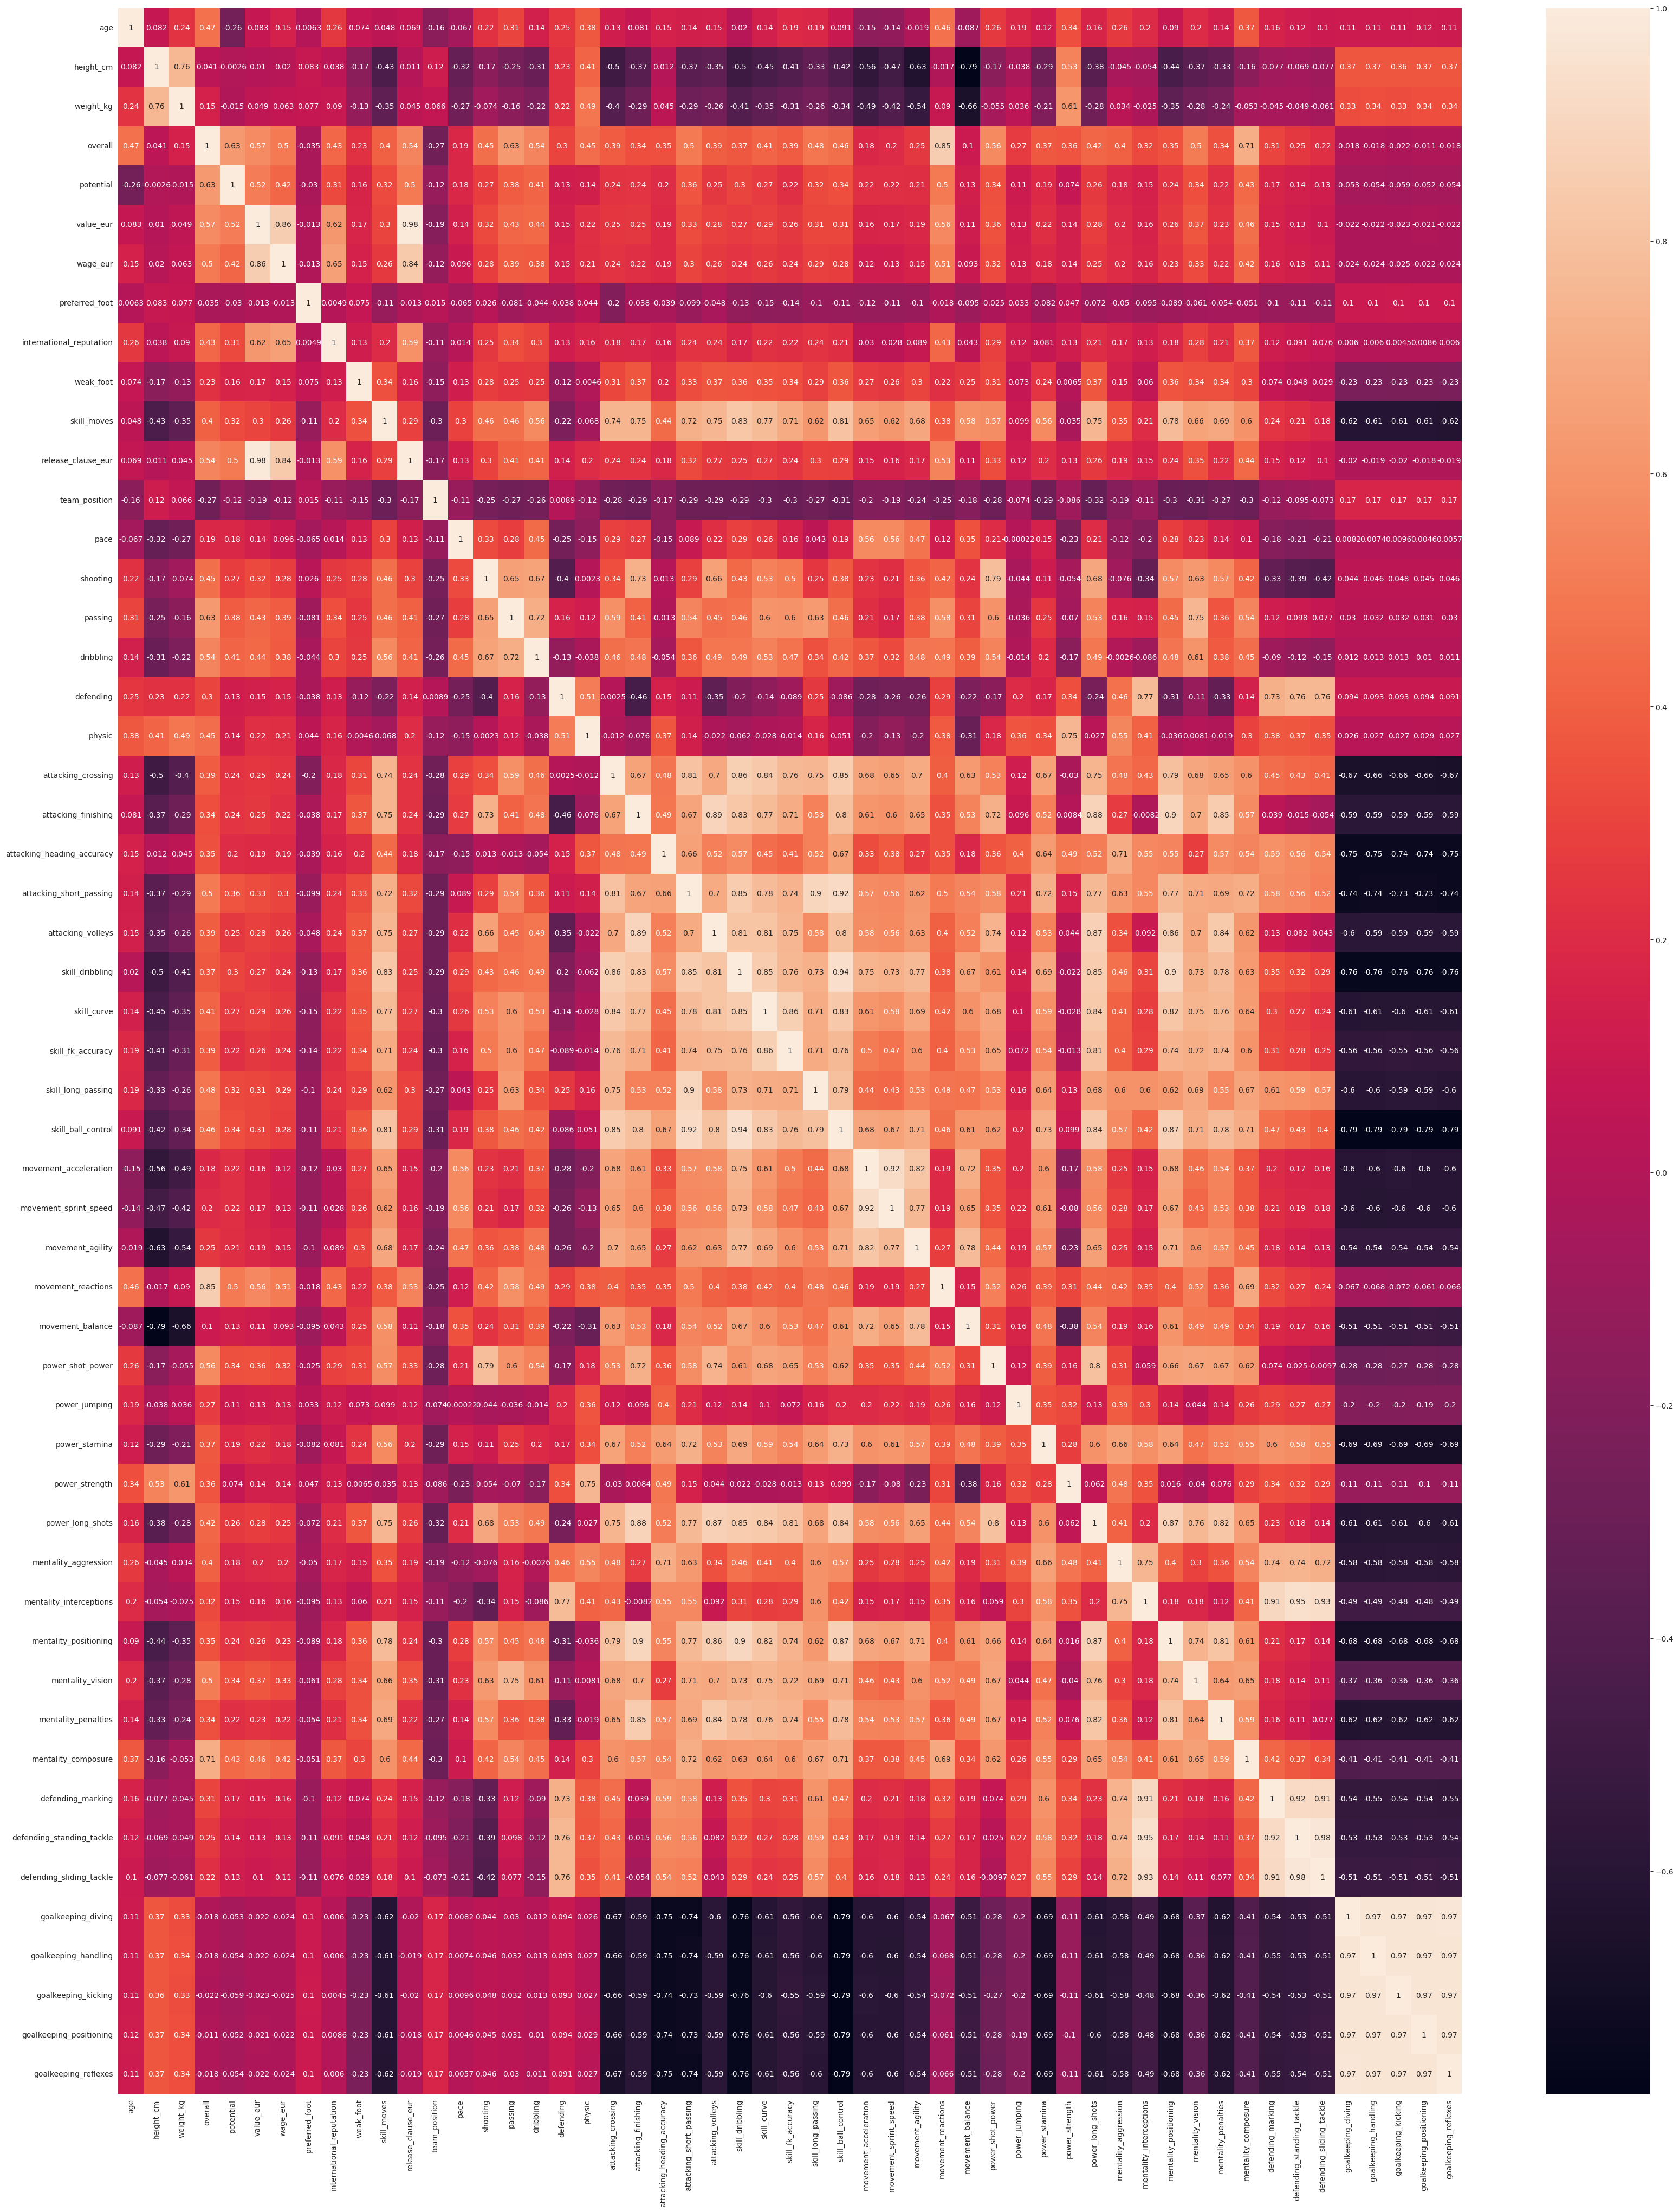

In [ ]:
plt.figure(figsize=(40,50))
sns.heatmap(df.corr(),annot=True)
plt.show()

* Detecting Highly Correlated Features for Better Analysis



In [ ]:
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9]
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0                   value_eur         release_clause_eur  0.979233
1          release_clause_eur                  value_eur  0.979233
2   defending_standing_tackle   defending_sliding_tackle  0.975808
3    defending_sliding_tackle  defending_standing_tackle  0.975808
4        goalkeeping_reflexes         goalkeeping_diving  0.973922
5          goalkeeping_diving       goalkeeping_reflexes  0.973922
6          goalkeeping_diving       goalkeeping_handling  0.971330
7        goalkeeping_handling         goalkeeping_diving  0.971330
8        goalkeeping_handling       goalkeeping_reflexes  0.971244
9        goalkeeping_reflexes       goalkeeping_handling  0.971244
10         goalkeeping_diving    goalkeeping_positioning  0.971218
11    goalkeeping_positioning         goalkeeping_diving  0.971218
12    goalkeeping_positioning       goalkeeping_reflexes  0.971060
13       goalkeeping_reflexes    goalkeeping_positioning  0.971060
14       goalkeeping_handling    goalkeeping_positioning  0.970517
15    goalkeeping_positioning       goalkeeping_handling  0.970517
16       goalkeeping_reflexes        goalkeeping_kicking  0.967866
17        goalkeeping_kicking       goalkeeping_reflexes  0.967866
18        goalkeeping_kicking         goalkeeping_diving  0.967057
19         goalkeeping_diving        goalkeeping_kicking  0.967057
20       goalkeeping_handling        goalkeeping_kicking  0.966508
21        goalkeeping_kicking       goalkeeping_handling  0.966508
22    goalkeeping_positioning        goalkeeping_kicking  0.966061
23        goalkeeping_kicking    goalkeeping_positioning  0.966061
24  defending_standing_tackle    mentality_interceptions  0.945287
25    mentality_interceptions  defending_standing_tackle  0.945287
26         skill_ball_control            skill_dribbling  0.943461
27            skill_dribbling         skill_ball_control  0.943461
28    mentality_interceptions   defending_sliding_tackle  0.933894
29   defending_sliding_tackle    mentality_interceptions  0.933894
30      movement_sprint_speed      movement_acceleration  0.923721
31      movement_acceleration      movement_sprint_speed  0.923721
32  defending_standing_tackle          defending_marking  0.918593
33          defending_marking  defending_standing_tackle  0.918593
34    attacking_short_passing         skill_ball_control  0.917721
35         skill_ball_control    attacking_short_passing  0.917721
36          defending_marking   defending_sliding_tackle  0.909153
37   defending_sliding_tackle          defending_marking  0.909153
38    mentality_interceptions          defending_marking  0.907401
39          defending_marking    mentality_interceptions  0.907401
40            skill_dribbling      mentality_positioning  0.904501
41      mentality_positioning            skill_dribbling  0.904501

##### DROP HIGHLY CORRELATED FEATURE

In [72]:
df.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

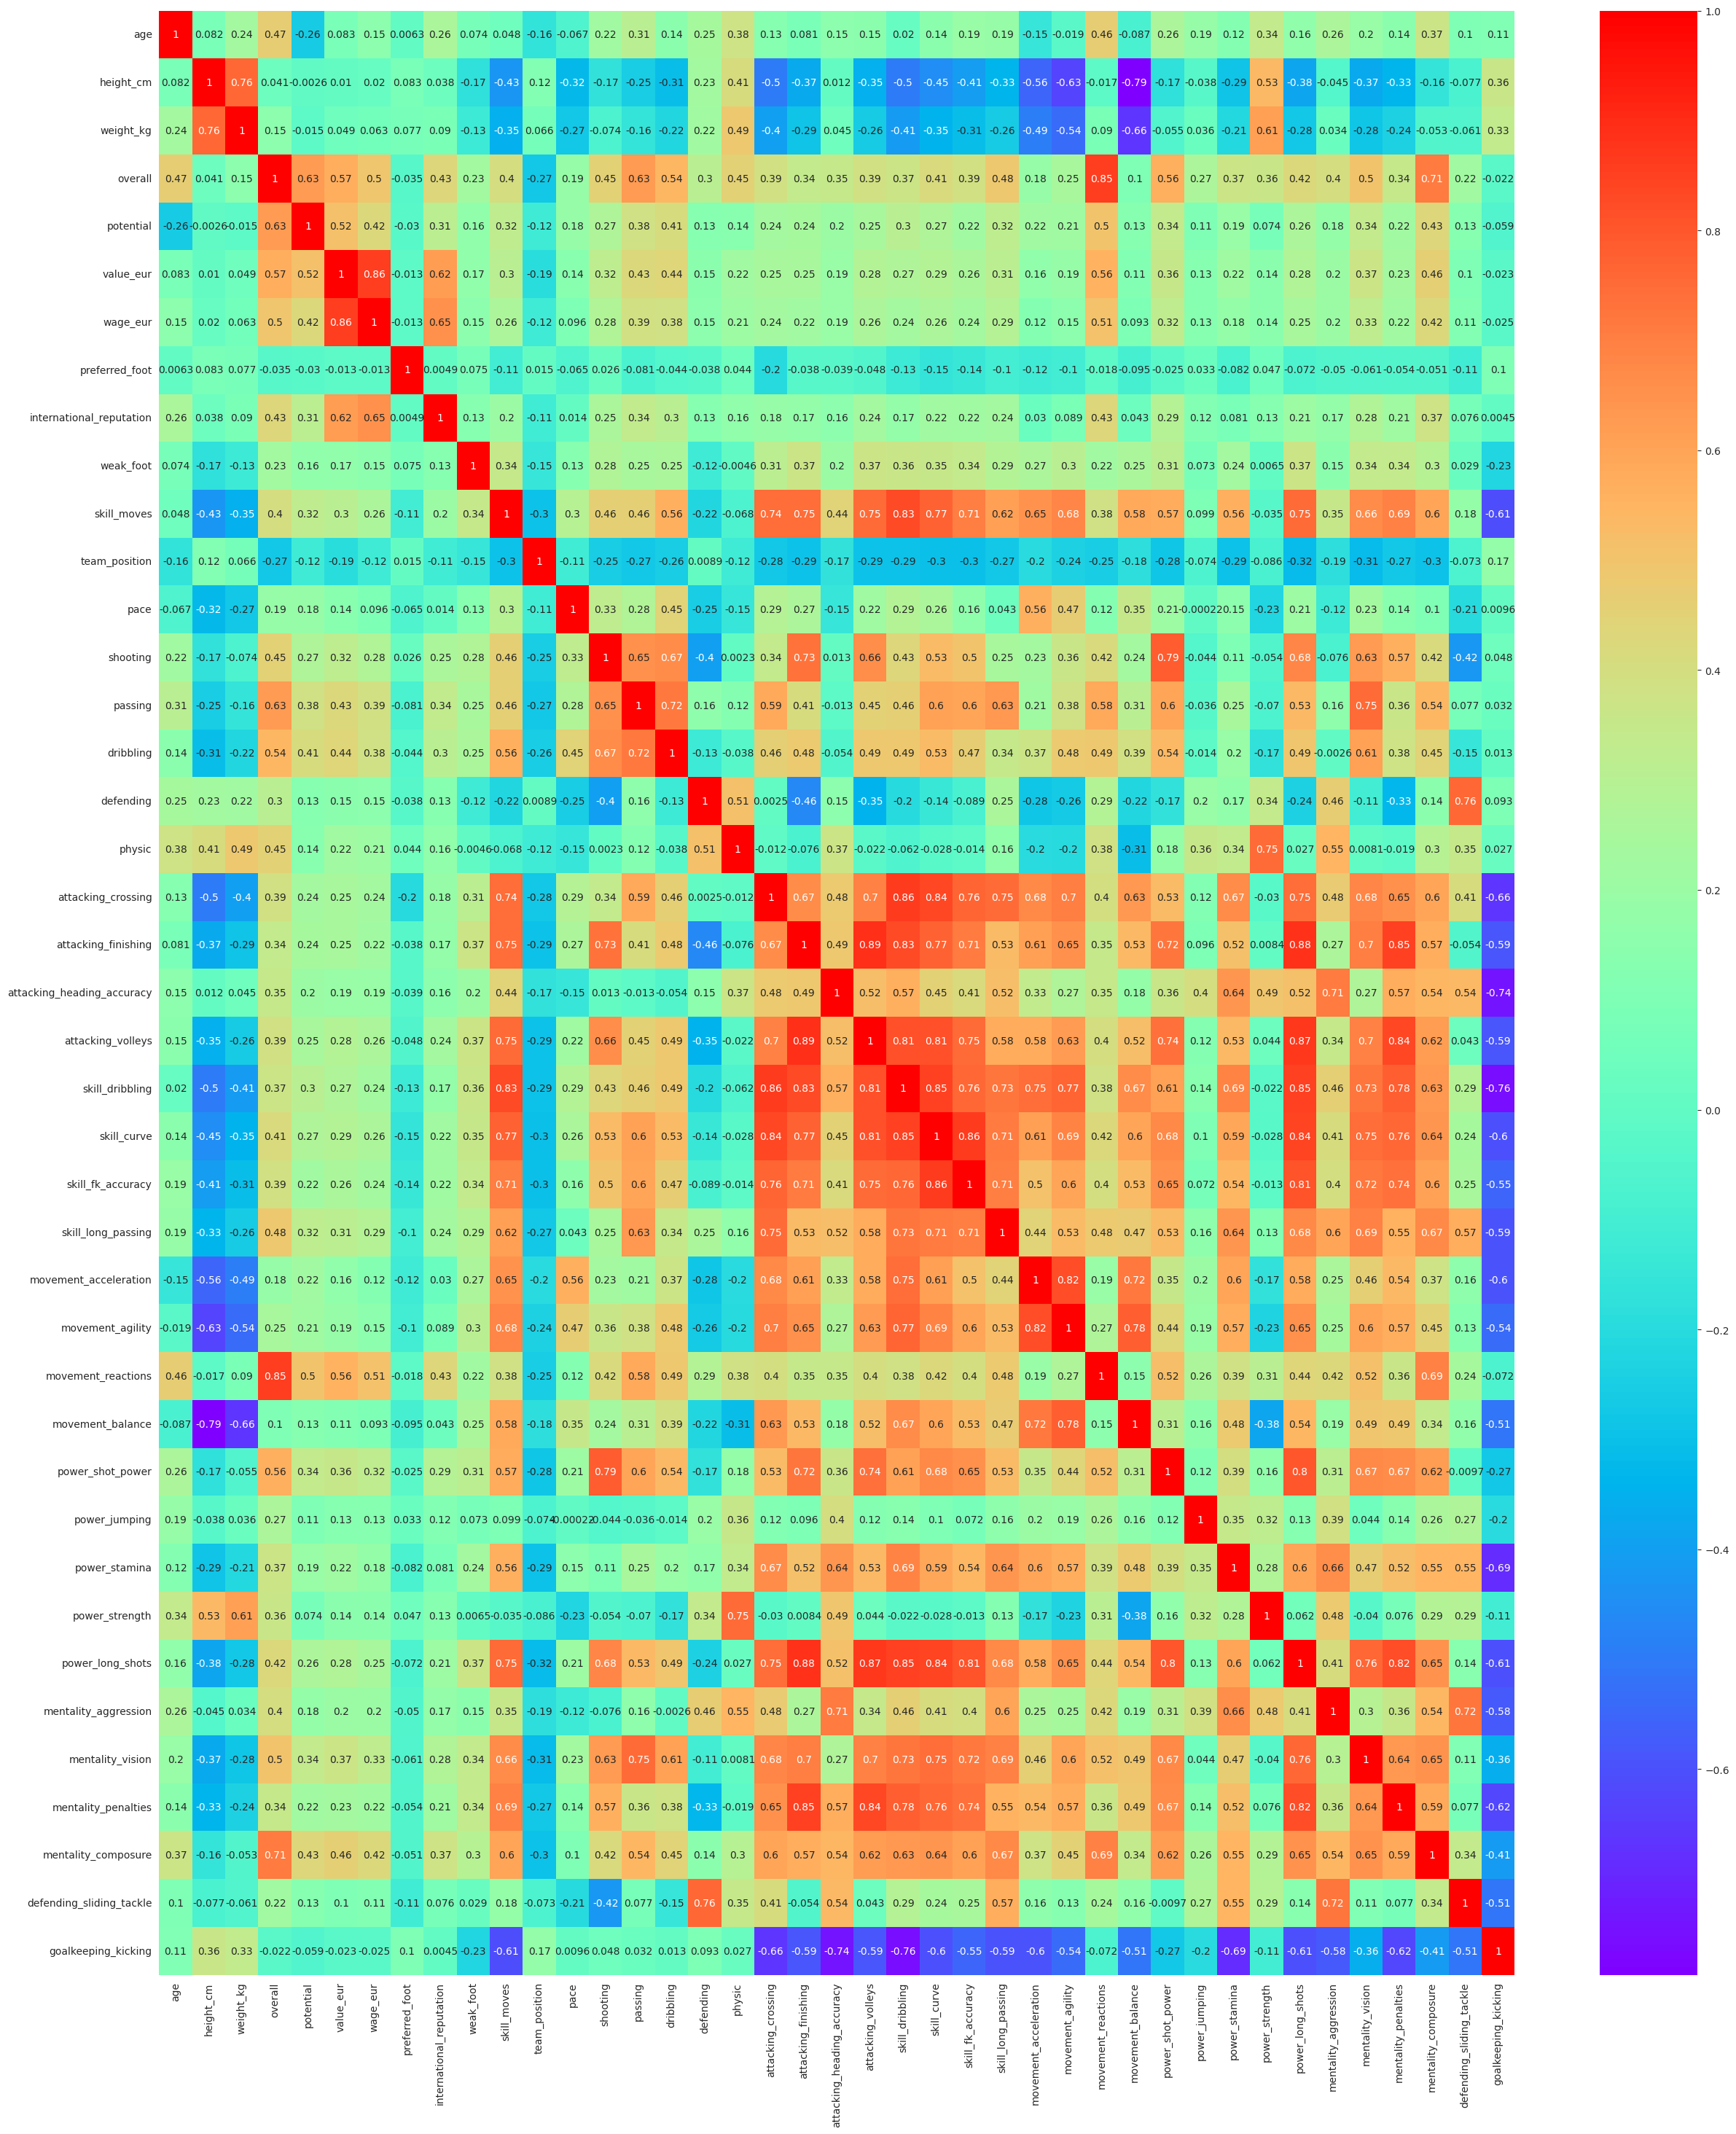

In [ ]:
plt.figure(figsize=(30,35))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

### CHECKING DUPLICATES

In [ ]:
df.duplicated().sum()

np.int64(0)

* There is no duplicate present in data.

## PRINCIPLE COMPONENT ANALYSIS(PCA)

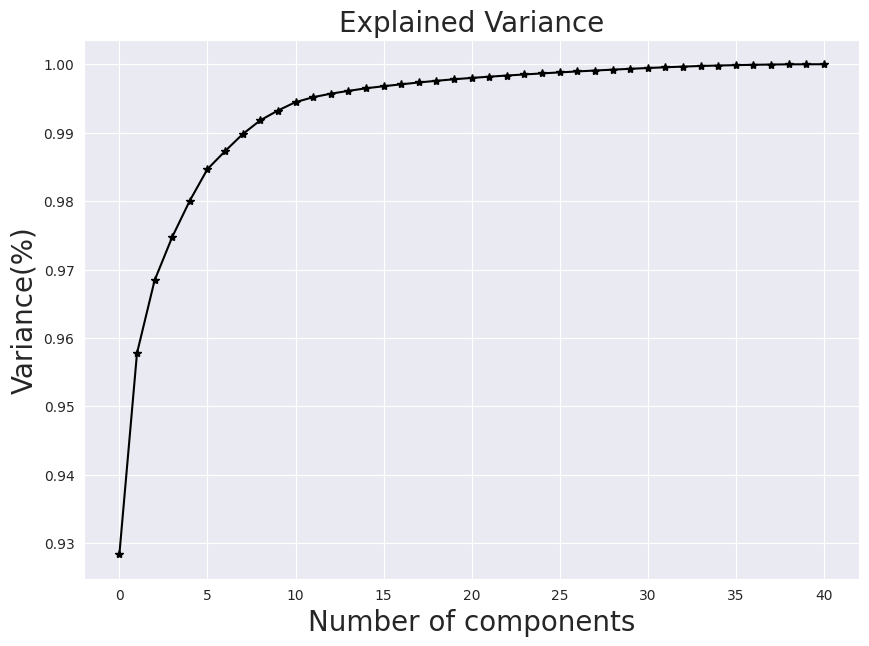

In [73]:
from sklearn.decomposition import PCA
pca=PCA()
principle_comp=pca.fit_transform(df)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') #plot the variance ratio
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

In [77]:
# np.where(np.cumsum(pca.explained_variance_ratio_)>0.90)

In [78]:
n_components = 10  # Define number of components
pca = PCA(n_components=n_components)
fifa = pca.fit_transform(df)

# Dynamically create column names
column_names = [f'pca{i+1}' for i in range(n_components)]
principle_df = pd.DataFrame(data=fifa, columns=column_names)

principle_df.head()


pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -15.465289  2.061390  0.112508  1.421002  0.382608  2.846684  1.460427   
1 -14.501372  2.611790  0.081053  1.623390  1.399029  2.264943  1.401793   
2  -8.532324  3.453046  0.919229  1.133329  1.228158  2.446072  1.776748   
3   1.789571 -1.355406  0.826584  1.015906  0.683209  1.645833  0.765856   
4 -14.449021  1.869193  0.355864  0.913893  1.055358  1.864511  1.062579   

       pca8      pca9     pca10  
0 -0.623396  1.173956  0.057763  
1  0.302606  1.288709  0.276380  
2 -0.051537  1.217852 -0.235845  
3 -0.219344  0.217090  0.252979  
4 -0.412056  0.919328 -0.069881

In [79]:
#Step:1 Define independant veriable
X = principle_df
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -15.465289  2.061390  0.112508  1.421002  0.382608  2.846684  1.460427   
1 -14.501372  2.611790  0.081053  1.623390  1.399029  2.264943  1.401793   
2  -8.532324  3.453046  0.919229  1.133329  1.228158  2.446072  1.776748   
3   1.789571 -1.355406  0.826584  1.015906  0.683209  1.645833  0.765856   
4 -14.449021  1.869193  0.355864  0.913893  1.055358  1.864511  1.062579   

       pca8      pca9     pca10  
0 -0.623396  1.173956  0.057763  
1  0.302606  1.288709  0.276380  
2 -0.051537  1.217852 -0.235845  
3 -0.219344  0.217090  0.252979  
4 -0.412056  0.919328 -0.069881

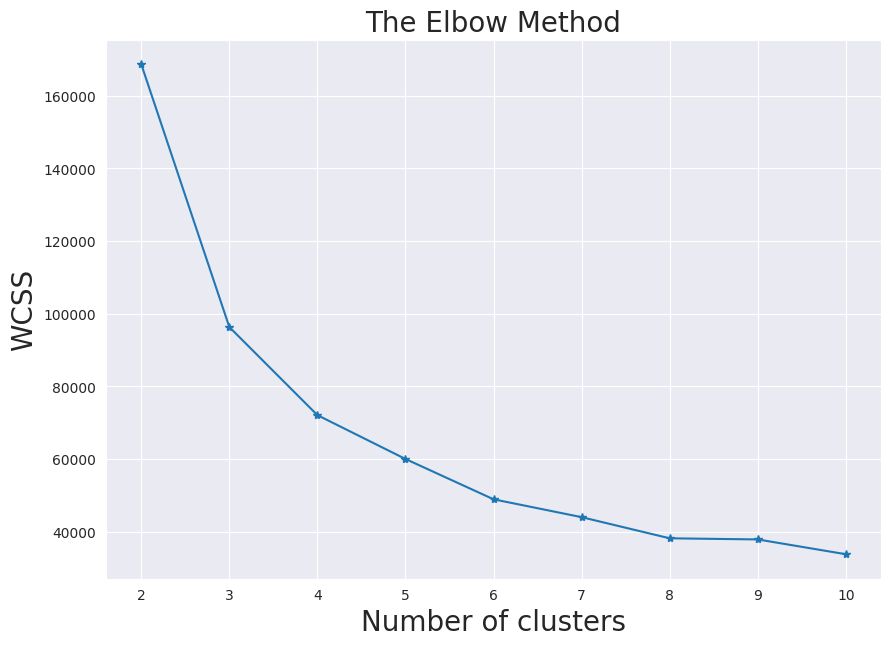

In [80]:
from sklearn.cluster import KMeans
kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()

In [81]:
# Step 3: Initialize KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=45)

# Step 4: Fit the data
kmeans.fit(X)

# Step 5: Get labels
principle_df['cluster'] = kmeans.labels_

# Step 6: Print dataset with labels
principle_df.head(10)


pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -15.465289  2.061390  0.112508  1.421002  0.382608  2.846684  1.460427   
1 -14.501372  2.611790  0.081053  1.623390  1.399029  2.264943  1.401793   
2  -8.532324  3.453046  0.919229  1.133329  1.228158  2.446072  1.776748   
3   1.789571 -1.355406  0.826584  1.015906  0.683209  1.645833  0.765856   
4 -14.449021  1.869193  0.355864  0.913893  1.055358  1.864511  1.062579   
5  -4.492669  2.871520  1.189381  1.477180  0.783625  1.680972  0.999125   
6   1.768015 -0.947989  1.727871  1.064672  0.507179  1.693560  0.698160   
7  -0.331313  0.306364  0.111502  1.989101  0.534990  0.781290  0.330942   
8  -4.468576  2.455061  0.272681  1.372595  0.891812  1.587611  1.321244   
9 -15.418568  1.313118 -0.764850  0.664879  0.083639  1.522039  0.519414   

       pca8      pca9     pca10  cluster  
0 -0.623396  1.173956  0.057763        1  
1  0.302606  1.288709  0.276380        1  
2 -0.051537  1.217852 -0.235845        2  
3 -0.219344  0.217090  0.252979        0  
4 -0.412056  0.919328 -0.069881        1  
5 -0.296663  0.631587 -0.148416        2  
6 -0.174540  0.202667  0.095780        0  
7 -0.532944  0.437279  0.317756        0  
8 -0.522906  0.529648 -0.344687        2  
9 -0.153156  0.554402  0.045589        1

### MODEL EVALUATION

##### SILHOUETTE SCORE
* Silhouette score range(-1 to +1)
* +1 ---> Samles are very far from cluster
*  0 ---> Samples close to dicision boundry
* -1 ---> Samples are assign to wrong cluster

In [82]:
# Step:8 Create a new veriable assign to labels
labels = kmeans.labels_
labels

# Step:9 import library to evaluate the model
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.6265530244776442


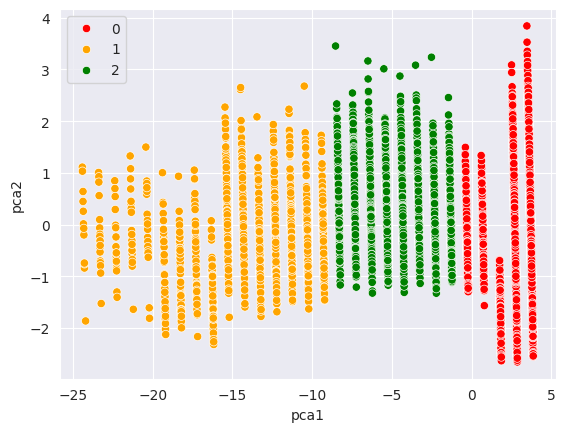

In [94]:
sns.scatterplot(x='pca1', y='pca2', data=principle_df, hue=kmeans.labels_, palette=['red', 'orange', 'green'])
plt.show()


### 1. **Introduction**

* The analysis focuses on the FIFA 20 dataset, which contains player attributes, financial information, performance metrics, and more. Various data exploration and clustering techniques were applied to extract insights.

2. **Problems Faced & Solutions**

2.1 **Missing Values**

**Problem:**

* Some attributes had missing values (e.g., release_clause_eur, loaned_from).

**Handling Strategy:**

* Filled missing numerical values with the median.

* Categorical missing values were replaced with 'Unknown'.

2.2 **High Dimensionality**

**Problem**:

* The dataset had too many features (~100 columns), making clustering and visualization difficult.

**Handling Strategy:**

* Used Principal Component Analysis (PCA) to reduce dimensions.

* Selected PCA1 and PCA2 for 2D visualization.

* Dropped less important columns that had high correlation with others to avoid redundancy.

2.3 **Cluster Interpretation**

**Problem:**

* After applying K-Means clustering (n=3), understanding clusters was difficult.

**Handling Strategy:**

* Used scatter plots with PCA components to visualize clusters.

* Compared clusters based on attributes like overall rating and potential.

* Other columns were dropped because clustering performs better when data is simplified and noise is reduced.

2.4 **Silhouette Score**

**Problem:**

* Needed to validate the quality of clusters.

**Handling Strategy:**

* Calculated Silhouette Score to measure clustering effectiveness.

* Adjusted cluster numbers and re-evaluated results.

3. **Key Insights from the Analysis**

* Top-rated players have higher market value and wages.

* Clusters show clear separation between elite, mid-tier, and low-tier players.

* PCA-based visualization helps in understanding player groupings.

* Silhouette Score provided insights into optimal clustering.

* Dropping extra columns improved clustering results and reduced noise.



4. **Conclusion**

* The analysis provided a clear understanding of player attributes and clustering performance. Handling missing values, dimensionality reduction, and validation techniques helped in improving the model effectiveness. PCA and column selection played a crucial role in optimizing results.

